# Progetto Business Intelligence per i Servizi Finanziari

## Sommario dei dati utilizzati

### Download dei dati

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
tickers = ['AAPL', 'NVDA', 'JPM', 'BAC', 'JNJ', 'PFE', '^GSPC']

In [4]:
def get(tickers, start, end):
    def data(ticker):
        return yf.download(ticker, start, end)
    datas = map(data, tickers)
    return pd.concat(datas,keys=tickers, names = ['Ticker','Date'])

In [5]:
all_data = get(tickers, start='2014-05-31', end='2024-05-31')
all_data.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close  \
Ticker Date                                                                
AAPL   2014-06-02  22.641430  22.672501  22.232143  22.451786  19.859390   
       2014-06-03  22.445000  22.812143  22.437500  22.769285  20.140240   
       2014-06-04  22.765715  23.138929  22.718214  23.029285  20.370214   
       2014-06-05  23.078571  23.191786  22.950357  23.119642  20.450142   
       2014-06-06  23.210714  23.259287  23.016787  23.056070  20.393906   

                      Volume  
Ticker Date                   
AAPL   2014-06-02  369350800  
       2014-06-03  292709200  
       2014-06-04  335482000  
       2014-06-05  303805600  
       2014-06-06  349938400

### Fusione

Prendo solo la colonna 'Adj Close' per ogni asset e li fondo in un unico dataset con le date come indici, i ticker come colonne e l'adj close come valori.

In [6]:
just_closing_prices = all_data[['Adj Close']].reset_index()

In [7]:
daily_close_px = just_closing_prices.pivot(index='Date', columns='Ticker', values='Adj Close')
daily_close_px.drop(['^GSPC'], axis=1, inplace=True)
daily_close_px.head()

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Date,,,,,,
2014-06-02,19.859390,12.456398,77.708130,41.671867,0.450743,19.234695
2014-06-03,20.140240,12.415586,77.928703,41.860077,0.448839,19.157007
2014-06-04,20.370214,12.415586,78.096001,41.920307,0.449315,19.189379
2014-06-05,20.450142,12.595166,78.506714,42.635548,0.451218,19.267065
2014-06-06,20.393906,12.725770,78.476288,42.891541,0.452884,19.046947


### Grafico Adjusted Close

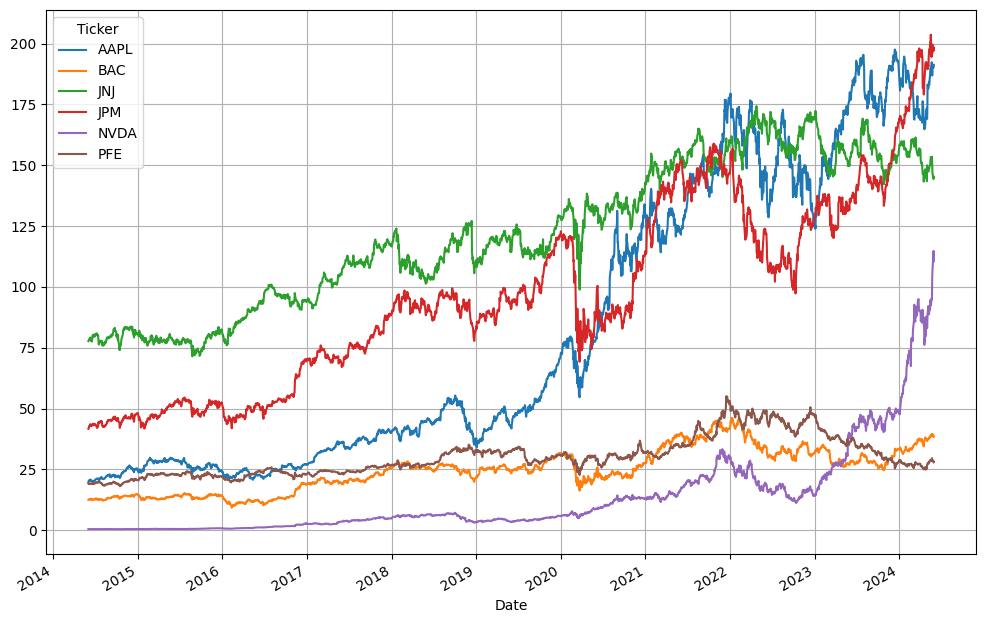

In [8]:
daily_close_px.plot(figsize=(12,8))
plt.grid()

### Grafici di prezzi e volumi per ogni asset

In [9]:
# TODO: Decidere se implementare nella relazione

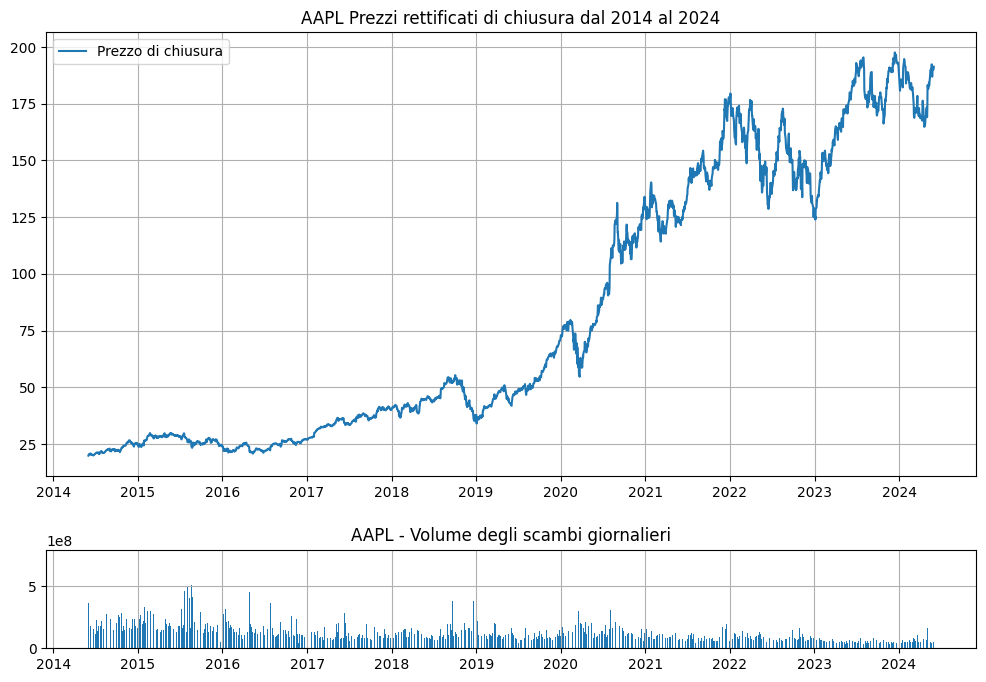

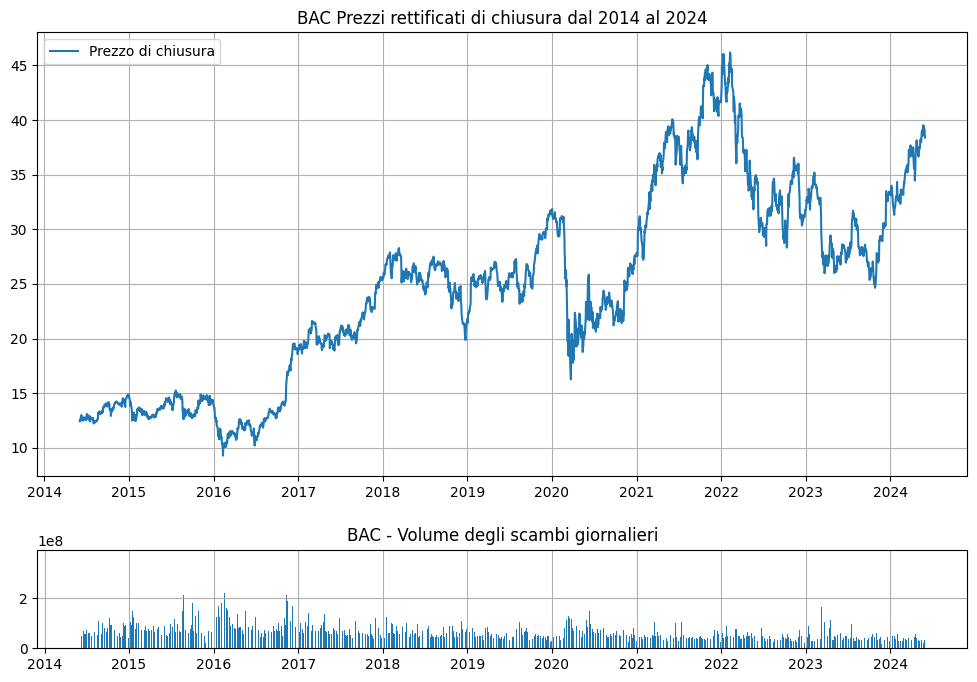

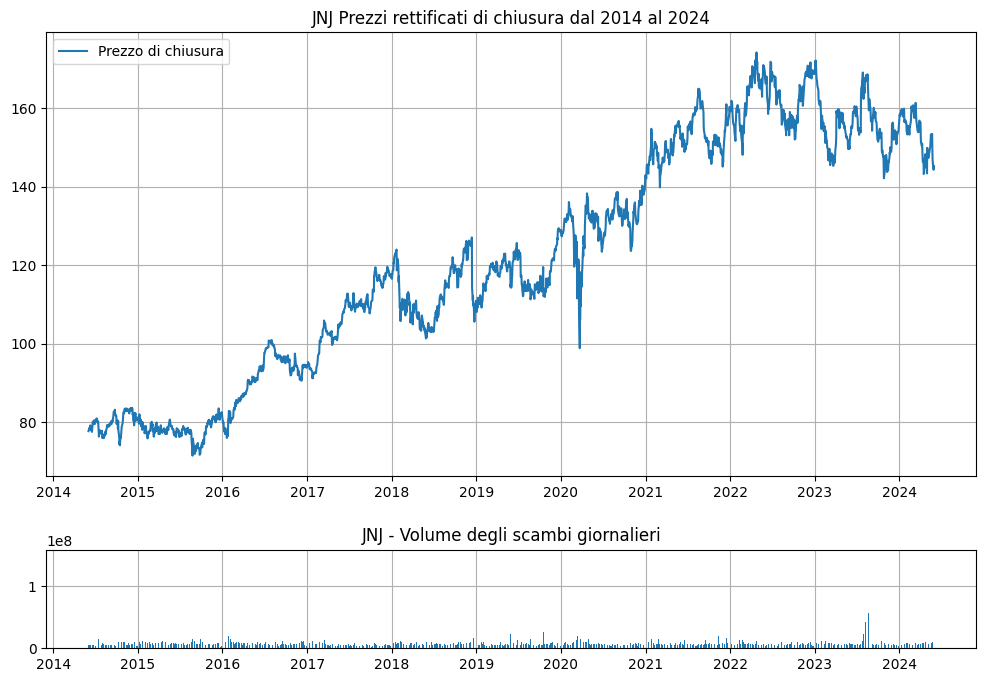

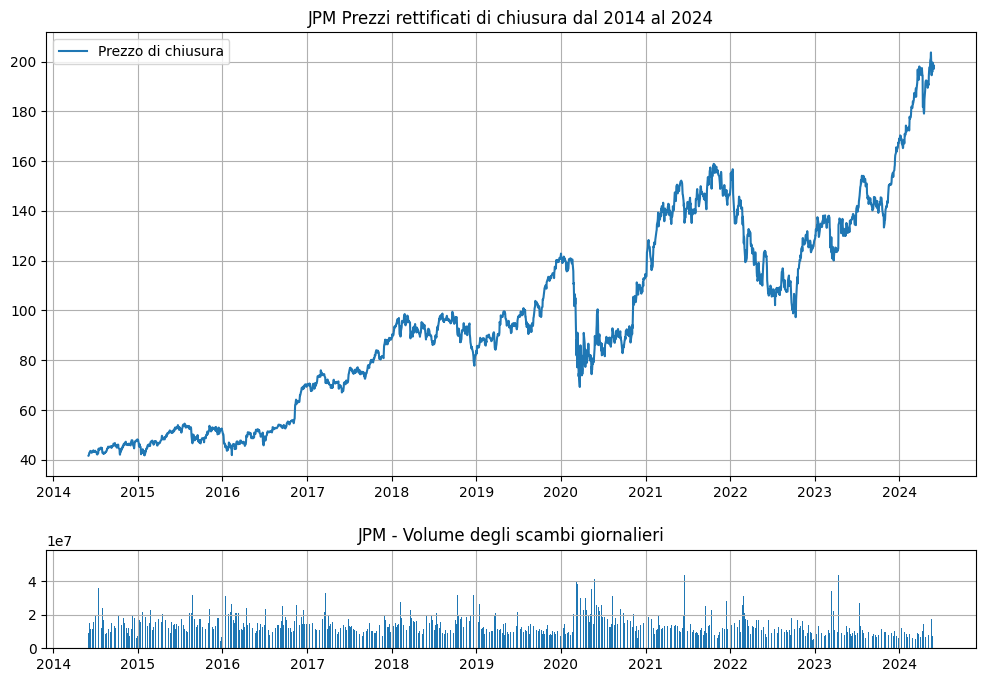

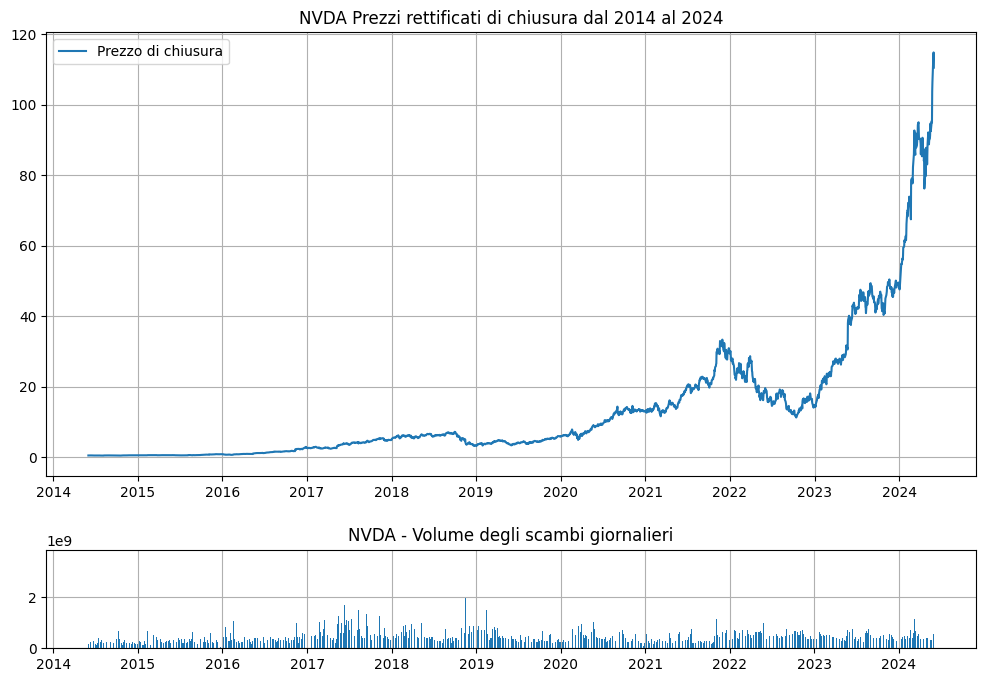

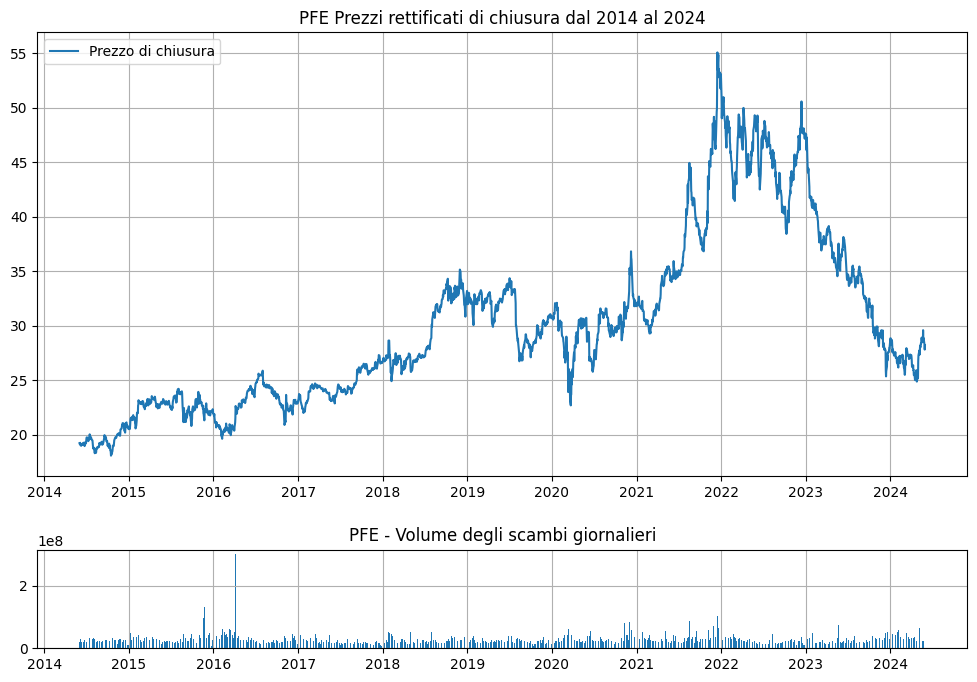

In [10]:
for ticker in daily_close_px.columns:
    top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan = 4)
    top.plot(daily_close_px.index,
            daily_close_px[ticker],
            label = 'Prezzo di chiusura')
    plt.title(f'{ticker} Prezzi rettificati di chiusura dal 2014 al 2024')
    plt.legend(loc=2)
    plt.grid()
    bottom = plt.subplot2grid((4,4), (3,0), rowspan = 1, colspan = 4)
    bottom.bar(all_data.Volume.loc[ticker].index, all_data.Volume.loc[ticker])
    plt.title(f'{ticker} - Volume degli scambi giornalieri')
    plt.gcf().set_size_inches(12,8)
    plt.subplots_adjust(hspace=0.75)
    plt.grid()
    plt.show()

## Statistiche descrittive

### Rendimento percentuale

In [11]:
daily_pct_change = daily_close_px.pct_change()
daily_pct_change.dropna(inplace=True)
daily_pct_change.head()

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Date,,,,,,
2014-06-03,0.014142,-0.003276,0.002838,0.004516,-0.004224,-0.004039
2014-06-04,0.011419,0.000000,0.002147,0.001439,0.001060,0.001690
2014-06-05,0.003924,0.014464,0.005259,0.017062,0.004237,0.004048
2014-06-06,-0.002750,0.010369,-0.000388,0.006004,0.003692,-0.011425
2014-06-09,0.016002,0.016036,0.000388,0.007899,0.001051,-0.002379


### Rendimento Cumulato

In [12]:
cum_daily_return = (1 + daily_pct_change).cumprod()
cum_daily_return

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Date,,,,,,
2014-06-03,1.014142,0.996724,1.002838,1.004516,0.995776,0.995961
2014-06-04,1.025722,0.996724,1.004991,1.005962,0.996832,0.997644
2014-06-05,1.029747,1.011140,1.010277,1.023125,1.001056,1.001683
2014-06-06,1.026915,1.021625,1.009885,1.029269,1.004752,0.990239
2014-06-09,1.043347,1.038008,1.010277,1.037399,1.005808,0.987883
...,...,...,...,...,...,...
2024-05-23,9.410158,3.125559,1.926439,4.699450,230.265570,1.491576
2024-05-24,9.566255,3.167850,1.891308,4.789898,236.188634,1.501453
2024-05-28,9.566759,3.137528,1.857978,4.761021,252.675628,1.471300


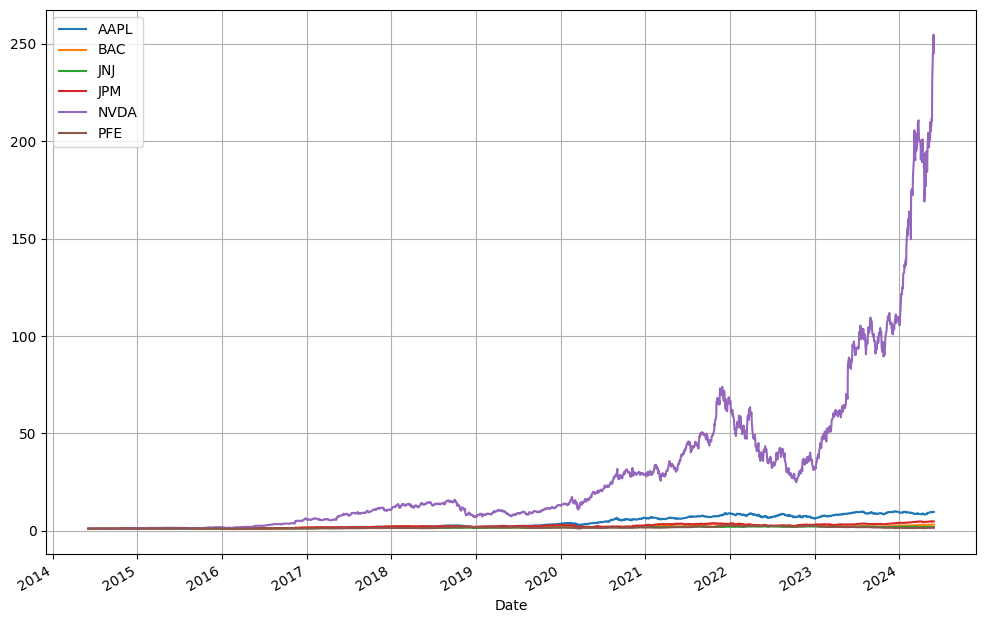

In [13]:
cum_daily_return.plot(figsize = (12,8))
plt.legend(loc=2)
plt.grid()

In [14]:
# TODO: Magari fare un grafico per ognuno e Decidere se implementare nella relazione

### Rendimento composto annuo

In [15]:
annual_compounded_returns = (cum_daily_return.iloc[-1] ** (1 / 10)) - 1
annual_compounded_returns

Ticker
AAPL    0.254217
BAC     0.119154
JNJ     0.064569
JPM     0.168781
NVDA    0.733564
PFE     0.039002
Name: 2024-05-30 00:00:00, dtype: float64

### Rendimento Semplice Netto e Lordo e Rendimento Logaritmico

In [16]:
daily_RS_gross = daily_close_px / daily_close_px.shift(1)
daily_RS_gross.dropna(inplace=True)
daily_RS_gross.head()

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Date,,,,,,
2014-06-03,1.014142,0.996724,1.002838,1.004516,0.995776,0.995961
2014-06-04,1.011419,1.000000,1.002147,1.001439,1.001060,1.001690
2014-06-05,1.003924,1.014464,1.005259,1.017062,1.004237,1.004048
2014-06-06,0.997250,1.010369,0.999612,1.006004,1.003692,0.988575
2014-06-09,1.016002,1.016036,1.000388,1.007899,1.001051,0.997621


In [17]:
daily_RS_net = daily_close_px.pct_change(1)
daily_RS_net.dropna(inplace=True)
daily_RS_net.head()

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Date,,,,,,
2014-06-03,0.014142,-0.003276,0.002838,0.004516,-0.004224,-0.004039
2014-06-04,0.011419,0.000000,0.002147,0.001439,0.001060,0.001690
2014-06-05,0.003924,0.014464,0.005259,0.017062,0.004237,0.004048
2014-06-06,-0.002750,0.010369,-0.000388,0.006004,0.003692,-0.011425
2014-06-09,0.016002,0.016036,0.000388,0.007899,0.001051,-0.002379


In [18]:
import numpy as np
daily_RL = np.log(daily_RS_gross)
daily_RL.head()

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Date,,,,,,
2014-06-03,0.014043,-0.003282,0.002834,0.004506,-0.004233,-0.004047
2014-06-04,0.011354,0.000000,0.002144,0.001438,0.001059,0.001688
2014-06-05,0.003916,0.014361,0.005245,0.016918,0.004228,0.004040
2014-06-06,-0.002754,0.010316,-0.000388,0.005986,0.003685,-0.011490
2014-06-09,0.015875,0.015908,0.000388,0.007868,0.001051,-0.002382


Unisco tutti i rendimenti per ogni asset e faccio un grafico

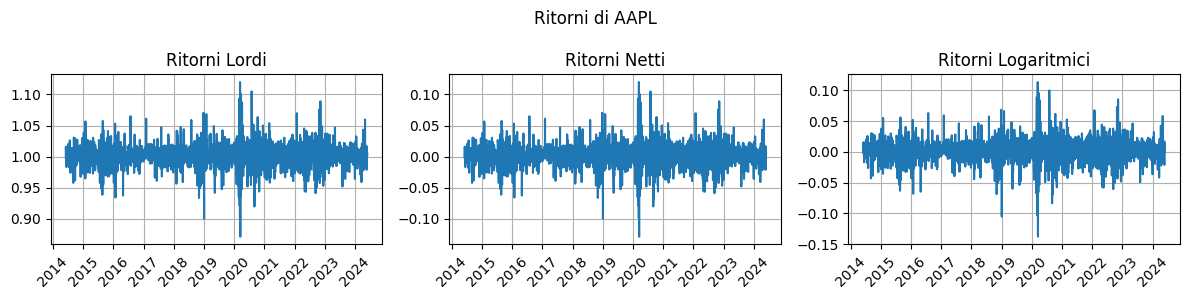

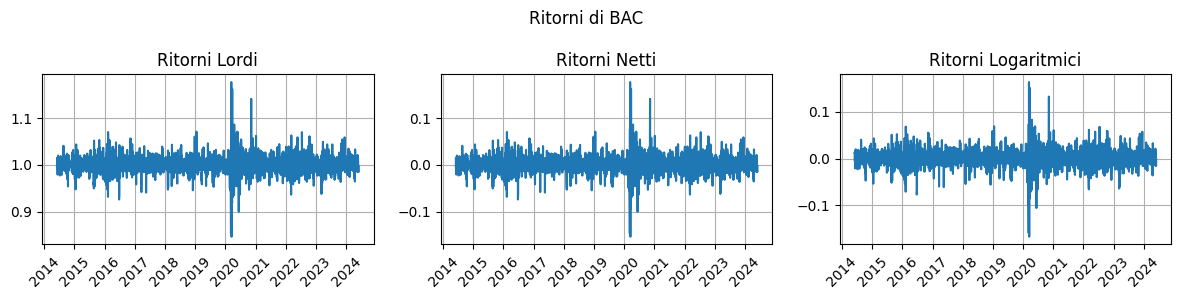

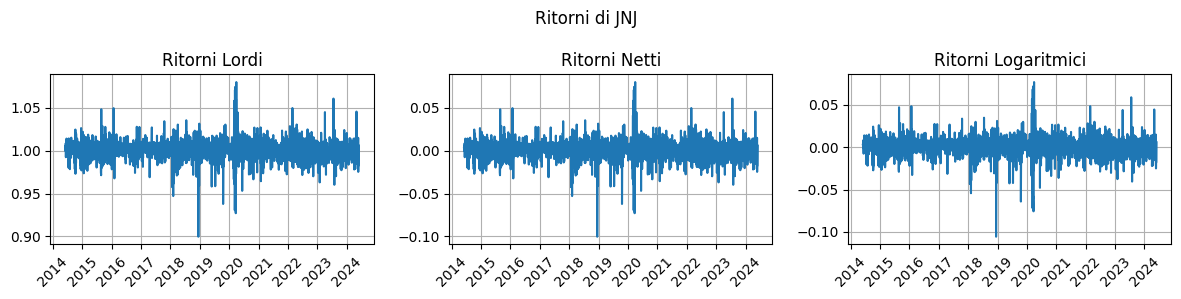

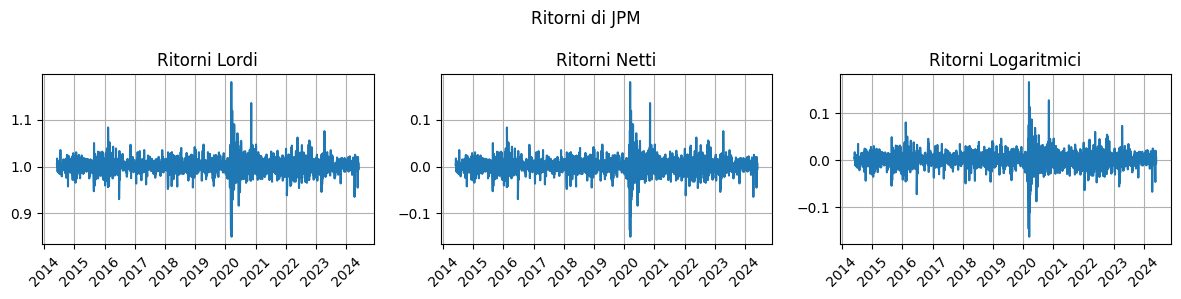

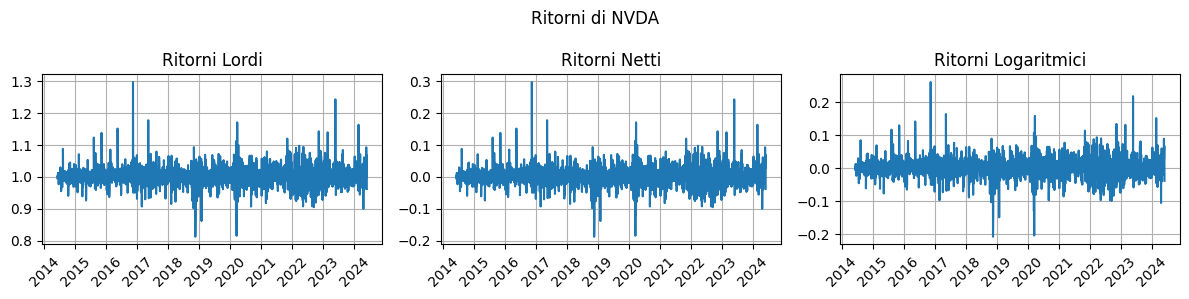

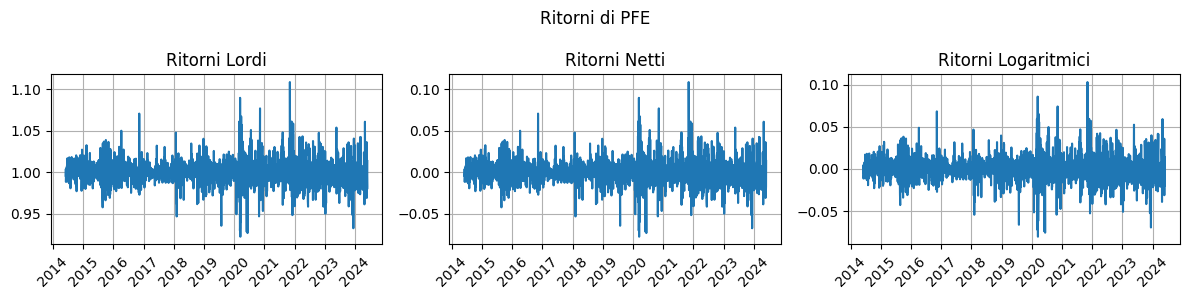

In [19]:
for ticker in daily_RS_gross.columns:
    fig, axs = plt.subplots(1,3, figsize=(12,3))
    fig.suptitle(f'Ritorni di {ticker}')
    axs[0].plot(daily_RS_gross[ticker])
    axs[0].set_title('Ritorni Lordi')
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].grid()
    axs[1].plot(daily_RS_net[ticker])
    axs[1].set_title('Ritorni Netti')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].grid()
    axs[2].plot(daily_RL[ticker])
    axs[2].set_title('Ritorni Logaritmici')
    axs[2].tick_params(axis='x', rotation=45)
    axs[2].grid()
    plt.tight_layout()
    plt.show()

### Describe per ogni asset

In [20]:
aapl = daily_pct_change['AAPL']
aapl.describe()

count    2516.000000
mean        0.001060
std         0.017841
min        -0.128647
25%        -0.007315
50%         0.000821
75%         0.010141
max         0.119808
Name: AAPL, dtype: float64

In [21]:
nvda = daily_pct_change['NVDA']
nvda.describe()

count    2516.000000
mean        0.002629
std         0.029824
min        -0.187559
25%        -0.011623
50%         0.002391
75%         0.016956
max         0.298067
Name: NVDA, dtype: float64

In [22]:
jpm = daily_pct_change['JPM']
jpm.describe()

count    2516.000000
mean        0.000764
std         0.016972
min        -0.149649
25%        -0.007065
50%         0.000615
75%         0.008523
max         0.180125
Name: JPM, dtype: float64

In [23]:
bac = daily_pct_change['BAC']
bac.describe()

count    2516.000000
mean        0.000637
std         0.019474
min        -0.153974
25%        -0.009021
50%         0.000489
75%         0.010463
max         0.177962
Name: BAC, dtype: float64

In [24]:
jnj = daily_pct_change['JNJ']
jnj.describe()

count    2516.000000
mean        0.000313
std         0.011374
min        -0.100379
25%        -0.004920
50%         0.000293
75%         0.005978
max         0.079977
Name: JNJ, dtype: float64

In [25]:
pfe = daily_pct_change['PFE']
pfe.describe()

count    2516.000000
mean        0.000255
std         0.014380
min        -0.077346
25%        -0.006703
50%         0.000000
75%         0.007036
max         0.108552
Name: PFE, dtype: float64

### Grafici a 3 sezioni per ogni azione

Calcolo il numero corretto di colonne utilizzando la formula di Freedman-Diaconis

In [26]:
from scipy import stats

bins = (np.max(aapl, axis = 0) - np.min(aapl, axis = 0)) / (2*stats.iqr(aapl, axis = 0) / np.power(len(aapl), 1.0/3))
bins = int(bins)

bins

96

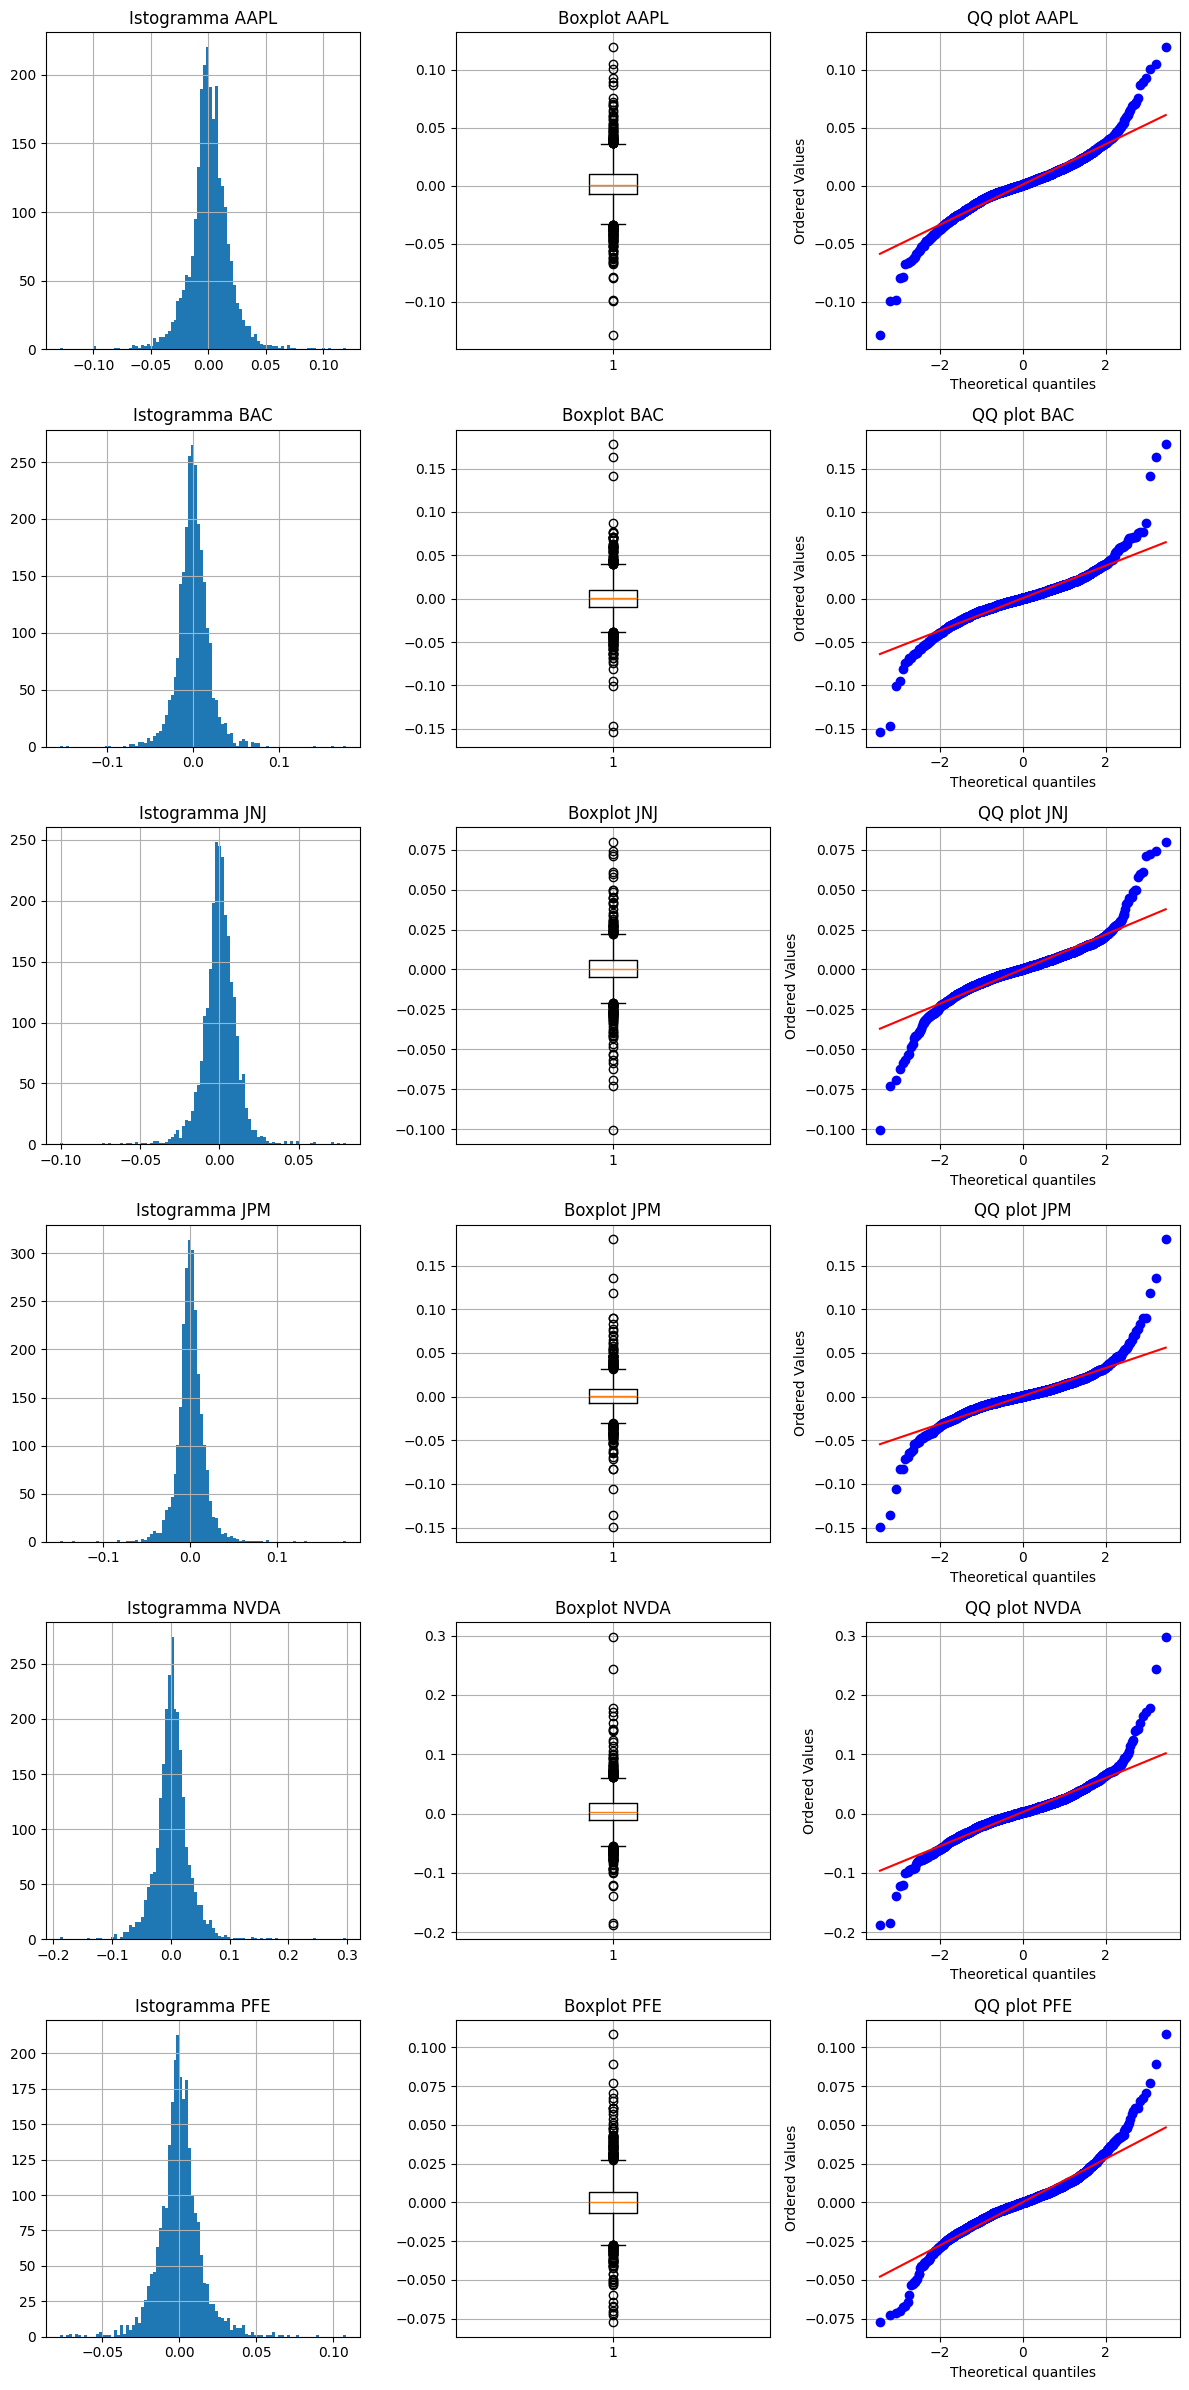

In [27]:
fig, axs = plt.subplots(6,3, figsize=(12,24))
for i, ticker in enumerate(daily_pct_change.columns):
    axs[i,0].hist(daily_pct_change[ticker], bins=bins)
    axs[i,0].set_title(f'Istogramma {ticker}')
    axs[i,0].grid()
    axs[i,1].boxplot(daily_pct_change[ticker])
    axs[i,1].set_title(f'Boxplot {ticker}')
    axs[i,1].grid()
    stats.probplot(daily_pct_change[ticker], dist='norm', plot=axs[i,2])
    axs[i,2].set_title(f'QQ plot {ticker}')
    axs[i,2].grid()
plt.tight_layout()
plt.show()

### Statistiche descrittive univariate

Calcolo media, varianza, deviazione standard, asimmetria e curtosi per ogni asset

In [28]:
from scipy.stats import skew, kurtosis

def calculate_statistics(df):
    stats = pd.DataFrame(index=df.columns, columns=['Mean', 'Variance', 'Standard Deviation', 'Skewness', 'Kurtosis'])

    stats['Mean'] = df.mean()
    stats['Variance'] = df.var()
    stats['Standard Deviation'] = df.std()
    stats['Skewness'] = df.apply(skew)
    stats['Kurtosis'] = df.apply(kurtosis)

    return stats

calculate_statistics(daily_pct_change)

,Mean,Variance,Standard Deviation,Skewness,Kurtosis
Ticker,,,,,
AAPL,0.001060,0.000318,0.017841,-0.018285,5.347803
BAC,0.000637,0.000379,0.019474,0.282623,10.075091
JNJ,0.000313,0.000129,0.011374,-0.175339,9.342206
JPM,0.000764,0.000288,0.016972,0.297477,14.082791
NVDA,0.002629,0.000889,0.029824,0.689947,9.250424
PFE,0.000255,0.000207,0.014380,0.303751,5.301886


### Matrice di varianze/covarianze e Correlazione dei rendimenti

In [29]:
cov_matrix = daily_RS_net.cov()
cov_matrix

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Ticker,,,,,,
AAPL,0.000318,0.000146,0.000074,0.000131,0.000289,0.000079
BAC,0.000146,0.000379,0.000083,0.000296,0.000197,0.000098
JNJ,0.000074,0.000083,0.000129,0.000080,0.000069,0.000086
JPM,0.000131,0.000296,0.000080,0.000288,0.000175,0.000093
NVDA,0.000289,0.000197,0.000069,0.000175,0.000889,0.000080
PFE,0.000079,0.000098,0.000086,0.000093,0.000080,0.000207


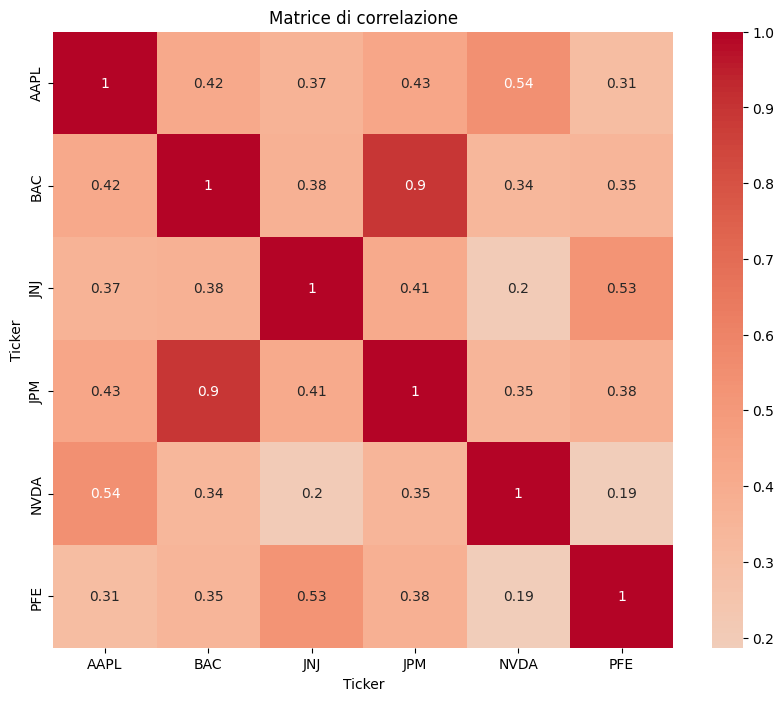

In [30]:
import seaborn as sns
corr_matrix = daily_RS_net.corr()
corr_matrix

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice di correlazione')
plt.show()

### Grafici di correlazione

#### Settore Tecnologia

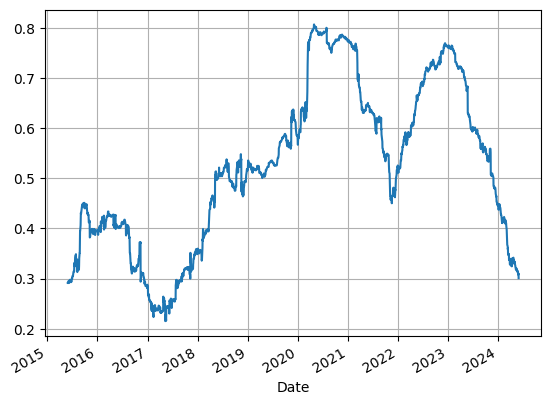

In [31]:
daily_pct_change['AAPL'].rolling(250).corr(daily_pct_change['NVDA']).plot()
plt.grid()

#### Settore Finanziario

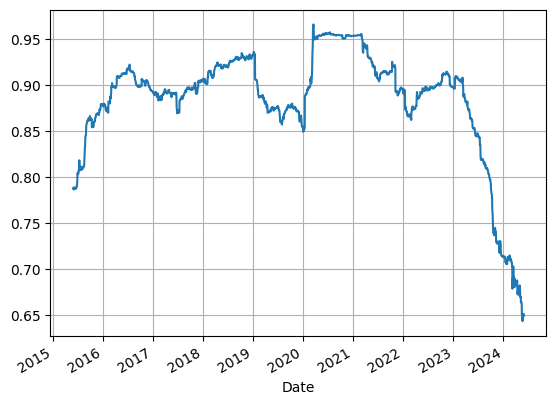

In [32]:
daily_pct_change['JPM'].rolling(250).corr(daily_pct_change['BAC']).plot()
plt.grid()

#### Settore Salute

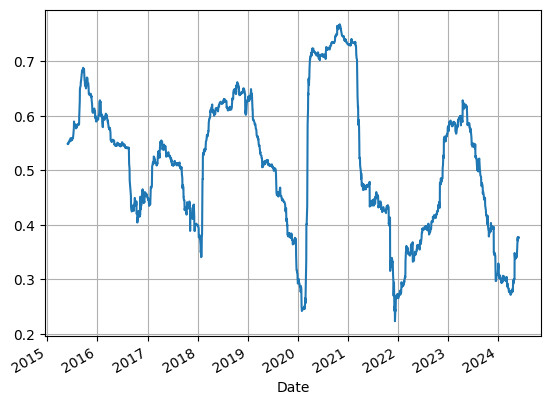

In [33]:
daily_pct_change['JNJ'].rolling(250).corr(daily_pct_change['PFE']).plot()
plt.grid()

### Grafici di Dispersione

In [34]:
def render_scatter_plot(data, x_stock_name,
                       y_stock_name, xlim=None, ylim=None):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.scatter(data[x_stock_name], data[y_stock_name])
    if xlim is not None: ax.set_xlim(xlim)
    ax.autoscale(False)
    ax.vlines(0, -10, 10)
    ax.hlines(0, -10, 10)
    ax.plot((-10,10),(-10,10))
    ax.set_xlabel(x_stock_name)
    ax.set_ylabel(y_stock_name)

#### Settore Tecnologia

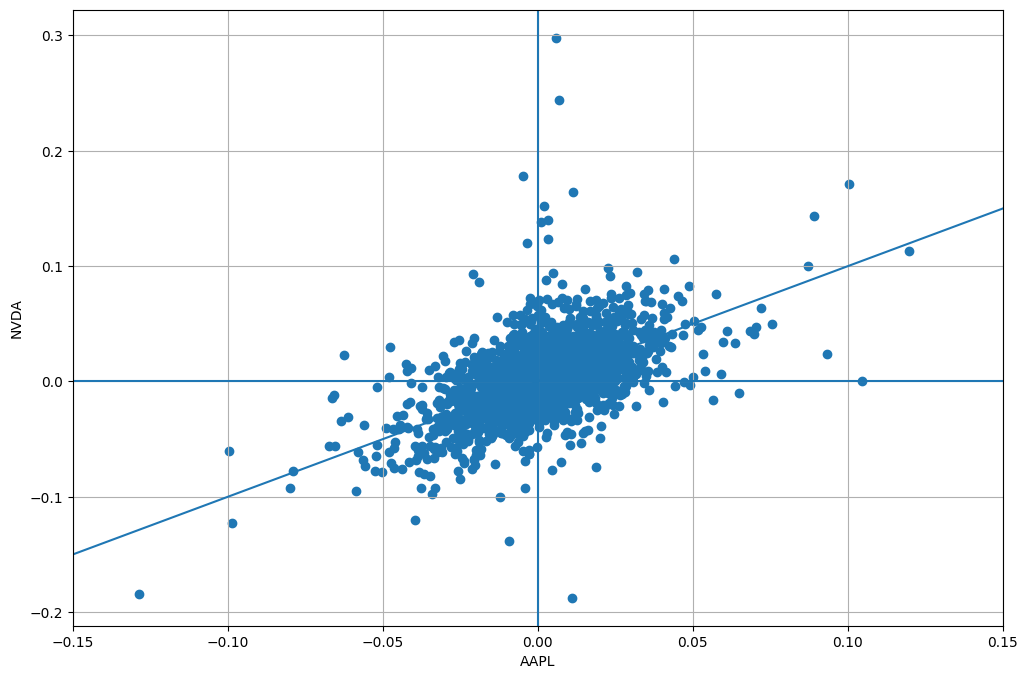

In [35]:
limits = [-0.15, 0.15]
render_scatter_plot(daily_pct_change, 'AAPL', 'NVDA', xlim=limits)
plt.grid()

#### Settore Finanziario

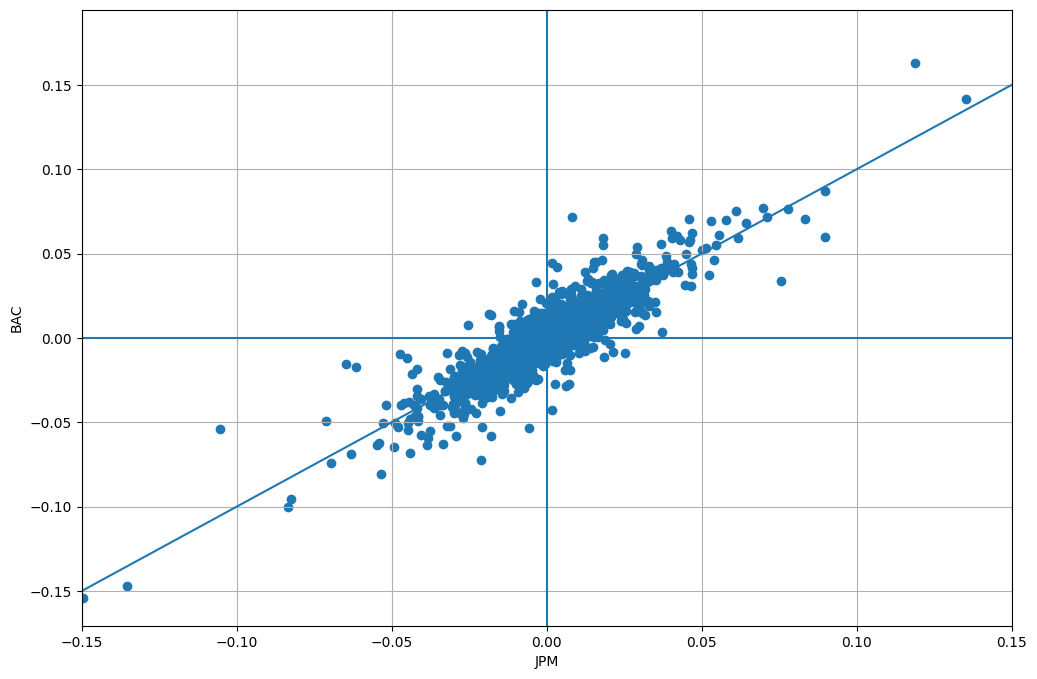

In [36]:
limits = [-0.15, 0.15]
render_scatter_plot(daily_pct_change, 'JPM', 'BAC', xlim=limits)
plt.grid()

#### Settore Salute

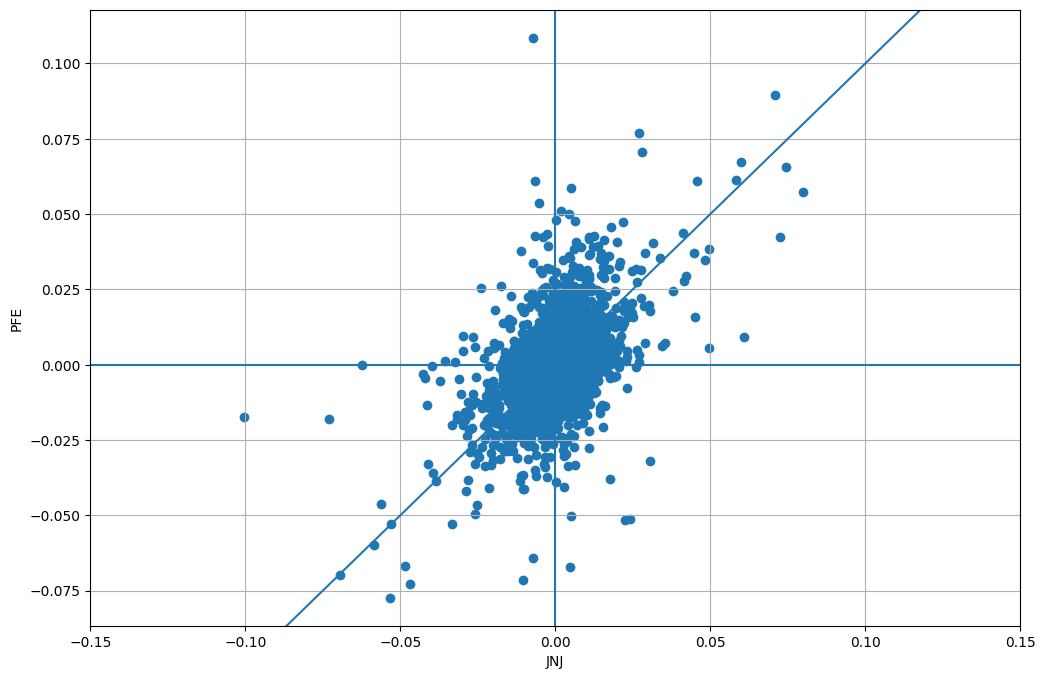

In [37]:
limits = [-0.15, 0.15]
render_scatter_plot(daily_pct_change, 'JNJ', 'PFE', xlim=limits)
plt.grid()

#### Matrice di scatter plot

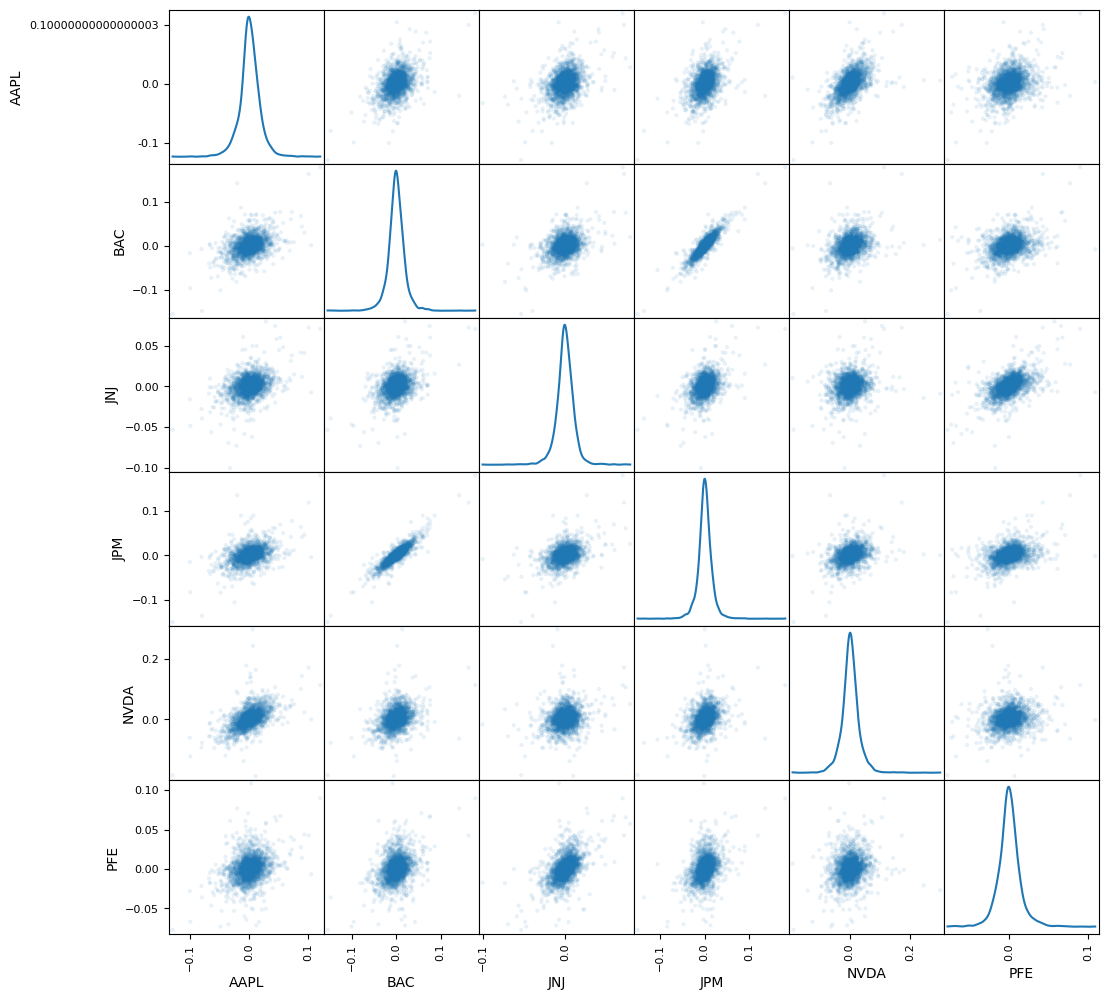

In [38]:
_ = pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1, figsize=(12,12))

## Analisi di Previsione

### Split data function

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def split_data(df, train_months=80, validation_months=30, test_months=10):
    total_months = train_months + validation_months + test_months
    days_in_month = round(len(df) / total_months)

    train_days = train_months * days_in_month
    validation_days = validation_months * days_in_month

    train_df = df.iloc[:train_days]
    validation_df = df.iloc[train_days:train_days + validation_days]
    test_df = df.iloc[train_days + validation_days:]

    return train_df, validation_df, test_df

In [41]:
# Suddivisione dei dati
train_df, validation_df, test_df = split_data(daily_close_px)

### SARIMAX grid search function

In [42]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import warnings, os, json
from tqdm import tqdm

warnings.filterwarnings("ignore")

In [43]:
# Funzione per eseguire grid search su parametri SARIMAX
def sarimax_grid_search(train_df, validation_df, ticker, pdq_range=(0, 2), s_range=[4, 6, 12]):
    # Controllo se esiste il file json con i risultati
    if os.path.exists(f"data/SARIMAX_configs/{ticker}_sarimax_config.json"):
        json_dict = json.load(open(f"data/SARIMAX_configs/{ticker}_sarimax_config.json"))
        return (json_dict["order"], json_dict["seasonal_order"], json_dict["mse"])

    p = d = q = range(pdq_range[0], pdq_range[1])
    param_combinations = list(itertools.product(p, d, q))
    best_model, lowest_mse = None, None

    total_iterations = len(param_combinations) * len(list(itertools.product(p, d, q, s_range)))

    with tqdm(total=total_iterations, desc="Grid Search Progress", ncols=100) as pbar:
        for order in param_combinations:
            for seasonal_order in itertools.product(p, d, q, s_range):
                try:
                    model = SARIMAX(train_df, order=order, seasonal_order=seasonal_order,
                                    enforce_stationarity=False, enforce_invertibility=False)
                    model_result = model.fit(disp=False) # maxiter=200
                    forecast = model_result.forecast(steps=len(validation_df))
                    mse = mean_squared_error(validation_df, forecast)
                    
                    if not lowest_mse or mse < lowest_mse:
                        lowest_mse = mse
                        best_model = (order, seasonal_order, mse)
                except Exception as ex:
                    continue
                pbar.update(1)

    # Creo la cartella se non esiste
    if not os.path.exists("data/SARIMAX_configs"):
        os.makedirs("data/SARIMAX_configs")
    # Salvo i risultati su file json
    json.dump({
        "order": best_model[0],
        "seasonal_order": best_model[1],
        "mse": best_model[2]
    }, open(f"data/SARIMAX_configs/{ticker}_sarimax_config.json", "w"))

    return best_model

### Cerco la miglior configurazione per ogni asset

In [44]:
# find the best model for each stock
best_models = {}
for ticker in daily_close_px.columns:
    print(f"\nGrid search for {ticker}...")
    order, seasonal_order, mse = sarimax_grid_search(train_df[ticker], validation_df[ticker], ticker)
    best_models[ticker] = {
        "order": order,
        "seasonal_order": seasonal_order,
        "mse": mse
    }
    print('SARIMAX {}x{}'.format(order, seasonal_order))
    print('Lowest RMSE: %.3f'%np.sqrt(mse))


Grid search for AAPL...
SARIMAX [0, 0, 0]x[1, 1, 0, 6]
Lowest RMSE: 23.810

Grid search for BAC...
SARIMAX [0, 0, 1]x[1, 0, 1, 12]
Lowest RMSE: 7.152

Grid search for JNJ...
SARIMAX [1, 0, 1]x[1, 1, 1, 4]
Lowest RMSE: 8.031

Grid search for JPM...
SARIMAX [0, 0, 1]x[1, 0, 1, 4]
Lowest RMSE: 18.352

Grid search for NVDA...
SARIMAX [1, 0, 0]x[0, 0, 1, 12]
Lowest RMSE: 7.135

Grid search for PFE...
SARIMAX [0, 0, 1]x[1, 0, 1, 6]
Lowest RMSE: 8.509


### SARIMAX Results

In [45]:
models = {}
for ticker in daily_close_px.columns:
    order = best_models[ticker]['order']
    seasonal_order = best_models[ticker]['seasonal_order']
    model = SARIMAX(np.append(train_df[ticker], validation_df[ticker]),
                    order=order, seasonal_order=seasonal_order,
                    enforce_stationarity=False, enforce_invertibility=False)
    model_result = model.fit(disp=False)
    models[ticker] = model_result

#### AAPL

In [46]:
print(models['AAPL'].summary())

                                SARIMAX Results                                
Dep. Variable:                       y   No. Observations:                 2310
Model:             SARIMAX(1, 1, 0, 6)   Log Likelihood               -6392.338
Date:                 Sat, 06 Jul 2024   AIC                          12788.677
Time:                         18:04:46   BIC                          12800.156
Sample:                              0   HQIC                         12792.862
                                - 2310                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6        0.0171      0.014      1.229      0.219      -0.010       0.044
sigma2        15.2643      0.264     57.827      0.000      14.747      15.782
Ljung-Box (L1) (Q):                1465.39  

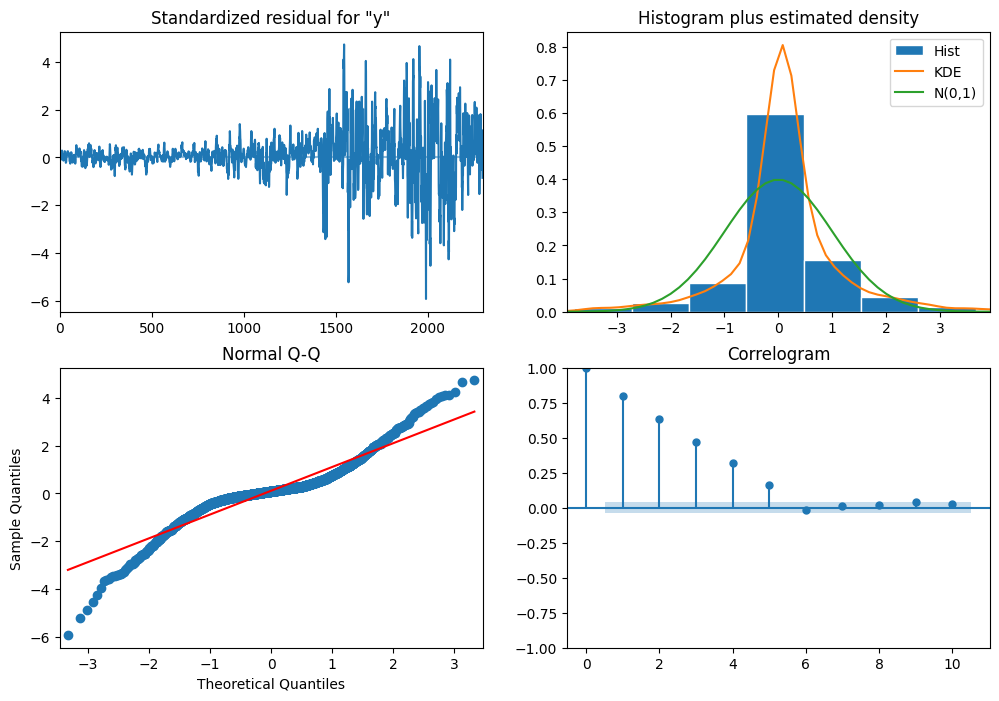

In [47]:
models['AAPL'].plot_diagnostics(figsize=(12,8));

#### NVDA

In [48]:
print(models['NVDA'].summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                 2310
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood               -1339.501
Date:                              Sat, 06 Jul 2024   AIC                           2685.002
Time:                                      18:04:47   BIC                           2702.220
Sample:                                           0   HQIC                          2691.280
                                             - 2310                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0019      0.000   2574.901      0.000       1.001       1.003
ma.S.L12      25.15

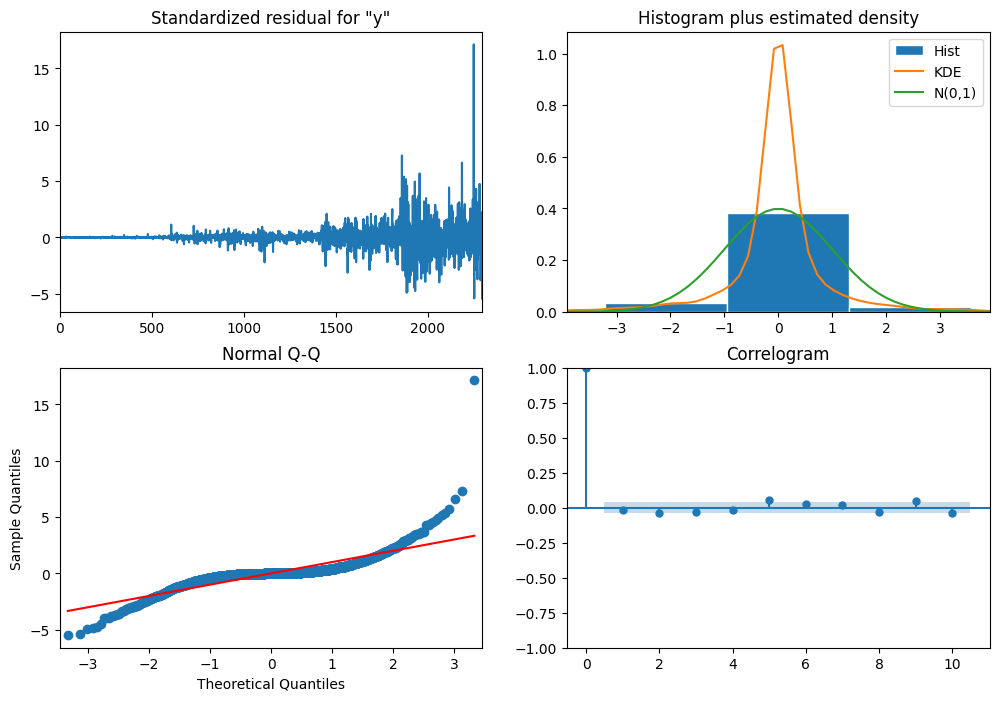

In [49]:
models['NVDA'].plot_diagnostics(figsize=(12,8));

#### JPM

In [50]:
print(models['JPM'].summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 2310
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 4)   Log Likelihood               -5303.672
Date:                           Sat, 06 Jul 2024   AIC                          10615.344
Time:                                   18:04:47   BIC                          10638.314
Sample:                                        0   HQIC                         10623.718
                                          - 2310                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7880      0.006    127.125      0.000       0.776       0.800
ar.S.L4        1.0013      0.001   1382.576

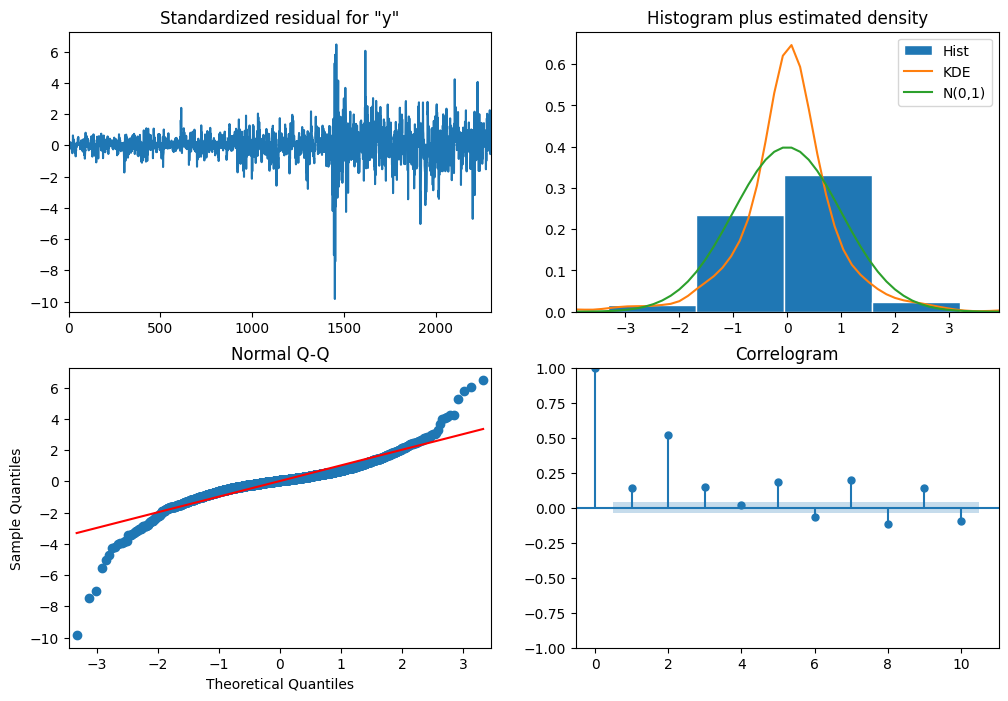

In [51]:
models['JPM'].plot_diagnostics(figsize=(12,8));

#### BAC

In [52]:
print(models['BAC'].summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 2310
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -3479.204
Date:                            Sat, 06 Jul 2024   AIC                           6966.409
Time:                                    18:04:48   BIC                           6989.364
Sample:                                         0   HQIC                          6974.779
                                           - 2310                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.8228      0.008    101.433      0.000       0.807       0.839
ar.S.L12       1.0009      0.001   

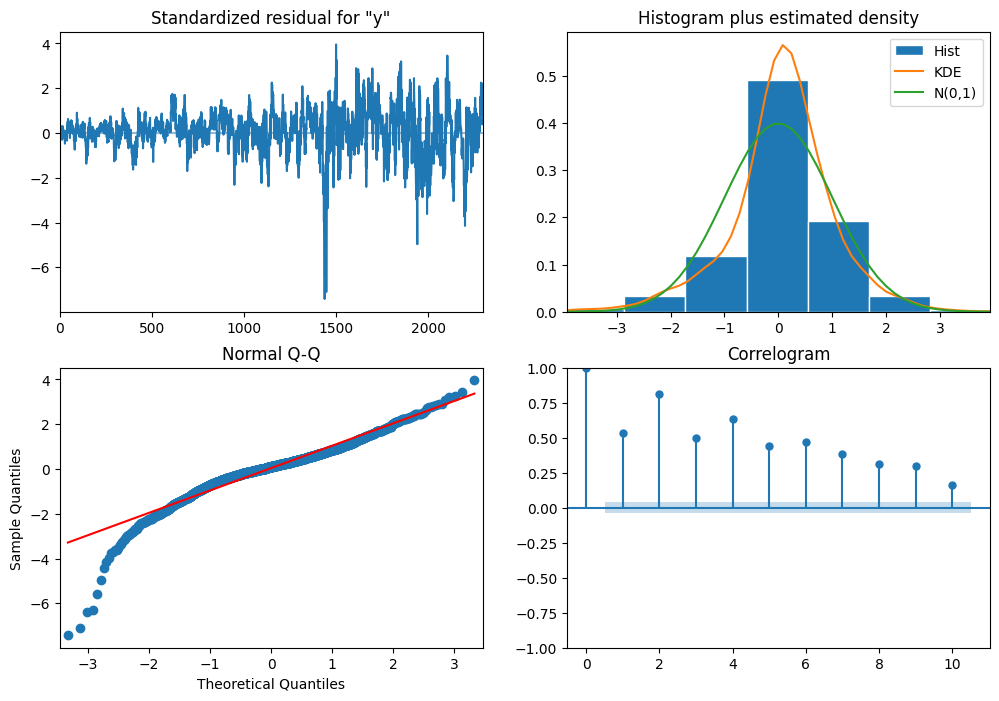

In [53]:
models['BAC'].plot_diagnostics(figsize=(12,8));

#### JNJ

In [54]:
print(models['JNJ'].summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 2310
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 4)   Log Likelihood               -4053.481
Date:                           Sat, 06 Jul 2024   AIC                           8116.961
Time:                                   18:04:48   BIC                           8145.665
Sample:                                        0   HQIC                          8127.426
                                          - 2310                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9992      0.001   1053.976      0.000       0.997       1.001
ma.L1         -0.0754      0.011     -6.861

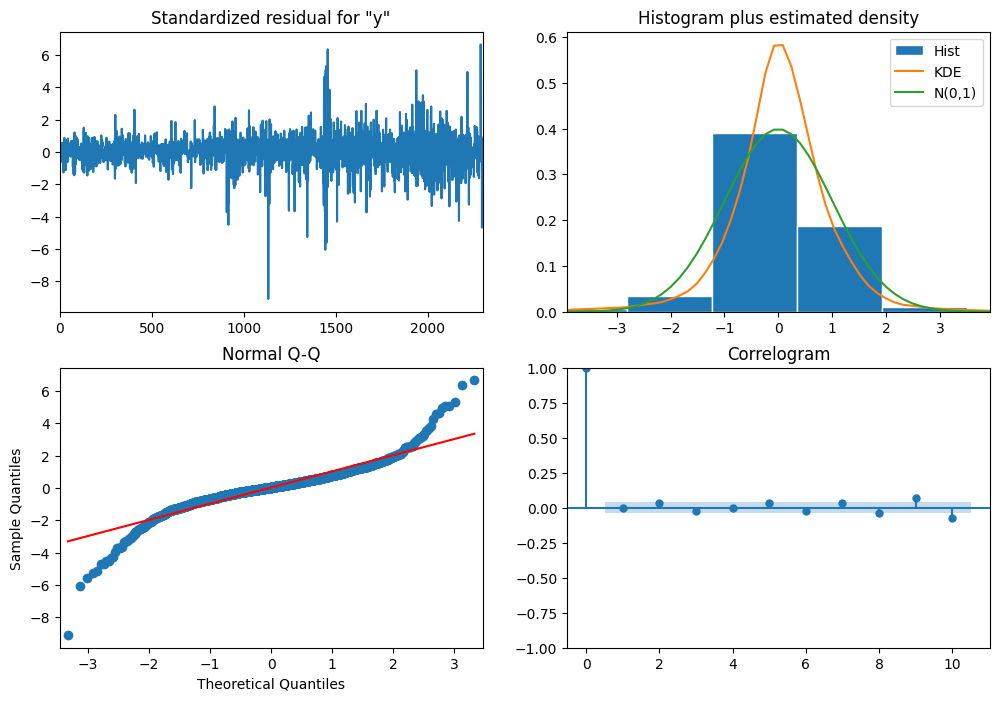

In [55]:
models['JNJ'].plot_diagnostics(figsize=(12,8));

#### PFE

In [56]:
print(models['PFE'].summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 2310
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 6)   Log Likelihood               -2830.614
Date:                           Sat, 06 Jul 2024   AIC                           5669.229
Time:                                   18:04:49   BIC                           5692.195
Sample:                                        0   HQIC                          5677.601
                                          - 2310                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.8733      0.006    143.132      0.000       0.861       0.885
ar.S.L6        1.0002      0.001   1378.951

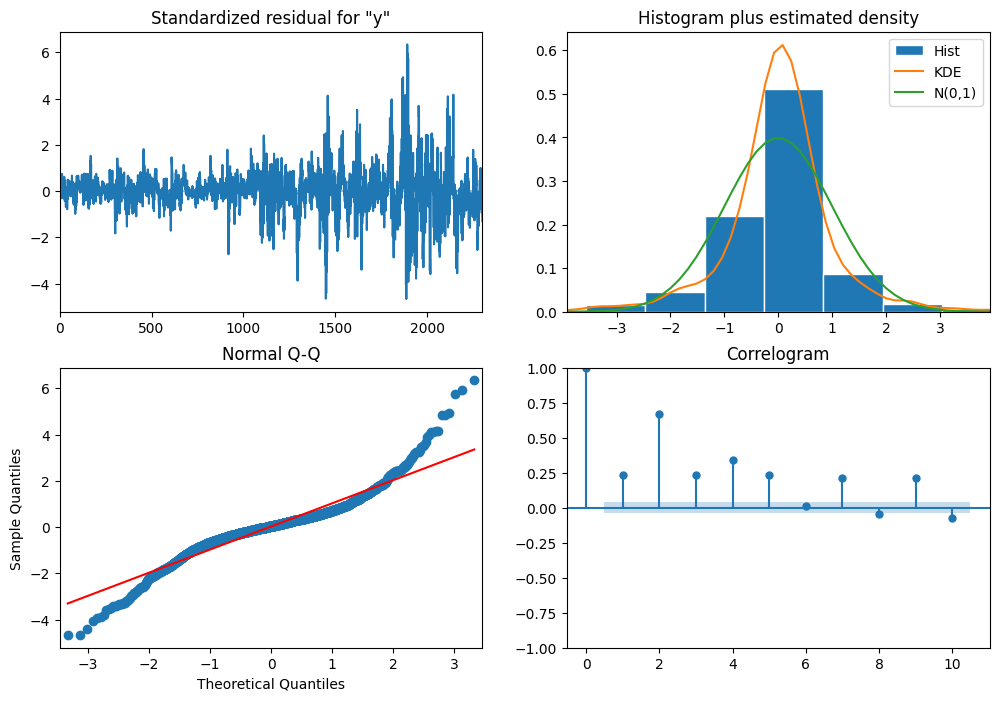

In [57]:
models['PFE'].plot_diagnostics(figsize=(12,8));

### Previsioni con SARIMAX

In [58]:
if os.path.exists(f"data/SARIMAX_configs/SARIMAX_predictions.json"):
    models_predictions = json.load(open(f"data/SARIMAX_configs/SARIMAX_predictions.json"))
else:
    models_predictions = {
        'AAPL': [],
        'NVDA': [],
        'JPM': [],
        'BAC': [],
        'JNJ': [],
        'PFE': []
    }

    total_iterations = len(test_df) * len(daily_close_px.columns)

    with tqdm(total=total_iterations, desc="Forecast Progress", ncols=100) as pbar:
        for ticker in daily_close_px.columns:
            model_fit = models[ticker]
            train_validation_df = np.append(train_df[ticker], validation_df[ticker])

            for i in range(len(test_df[ticker])):
                forecast = model_fit.forecast(steps=1)
                models_predictions[ticker].append(forecast[0])

                train_validation_df = np.append(train_validation_df, test_df[ticker].iloc[i])
                model = SARIMAX(train_validation_df, order=best_models[ticker]['order'],
                                seasonal_order=best_models[ticker]['seasonal_order'],
                                enforce_stationarity=False, enforce_invertibility=False)
                
                model_fit = model.fit(disp=False)

                pbar.update(1)

    json.dump(models_predictions, open(f"data/SARIMAX_configs/SARIMAX_predictions.json", "w"))

#### AAPL

In [59]:
mse = mean_squared_error(test_df['AAPL'], models_predictions['AAPL'])
print(f"AAPL MSE: {mse}")
print(f"AAPL RMSE: {np.sqrt(mse)}")

AAPL MSE: 42.93919621989517
AAPL RMSE: 6.552800639413286


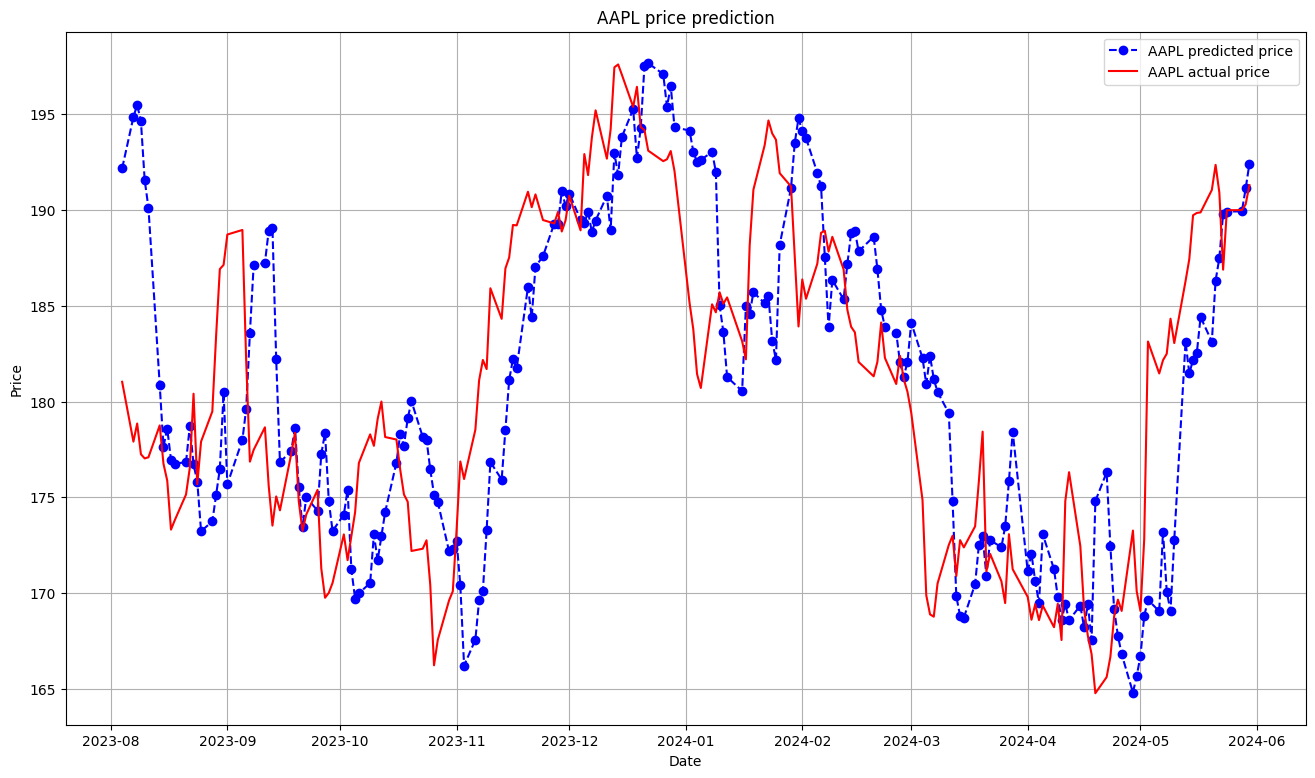

In [60]:
plt.figure(figsize=(16,9))
plt.grid(True)
date_range = test_df.index
plt.plot(date_range, models_predictions['AAPL'], color = 'blue', marker = 'o', linestyle = 'dashed', label = 'AAPL predicted price' )
plt.plot(date_range, list(test_df['AAPL']), color = 'red', label = 'AAPL actual price' )
plt.title('AAPL price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### NVDA

In [61]:
mse = mean_squared_error(test_df['NVDA'], models_predictions['NVDA'])
print(f"NVDA MSE: {mse}")
print(f"NVDA RMSE: {np.sqrt(mse)}")

NVDA MSE: 4.2024604110901125
NVDA RMSE: 2.04999034414558


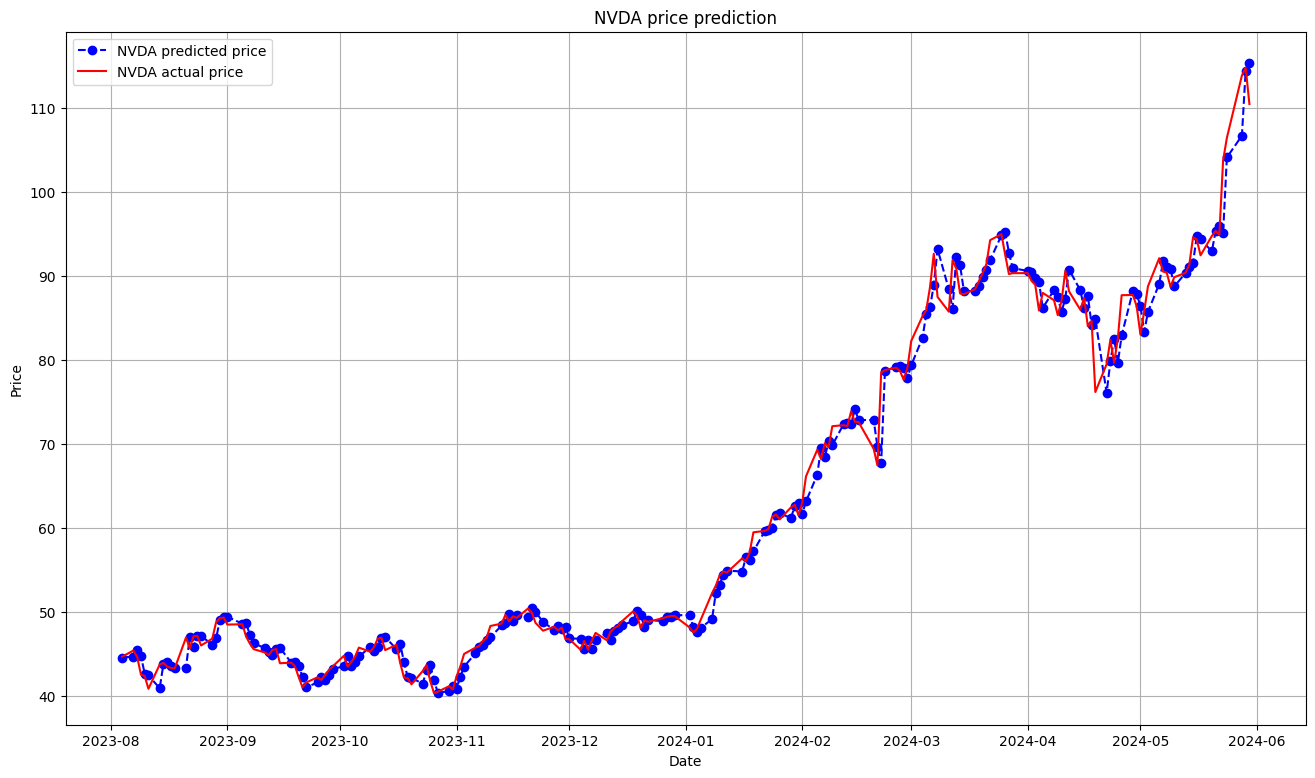

In [62]:
plt.figure(figsize=(16,9))
plt.grid(True)
date_range = test_df.index
plt.plot(date_range, models_predictions['NVDA'], color = 'blue', marker = 'o', linestyle = 'dashed', label = 'NVDA predicted price' )
plt.plot(date_range, list(test_df['NVDA']), color = 'red', label = 'NVDA actual price' )
plt.title('NVDA price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### JPM

In [63]:
mse = mean_squared_error(test_df['JPM'], models_predictions['JPM'])
print(f"JPM MSE: {mse}")
print(f"JPM RMSE: {np.sqrt(mse)}")

JPM MSE: 9.886353546192192
JPM RMSE: 3.144257232828159


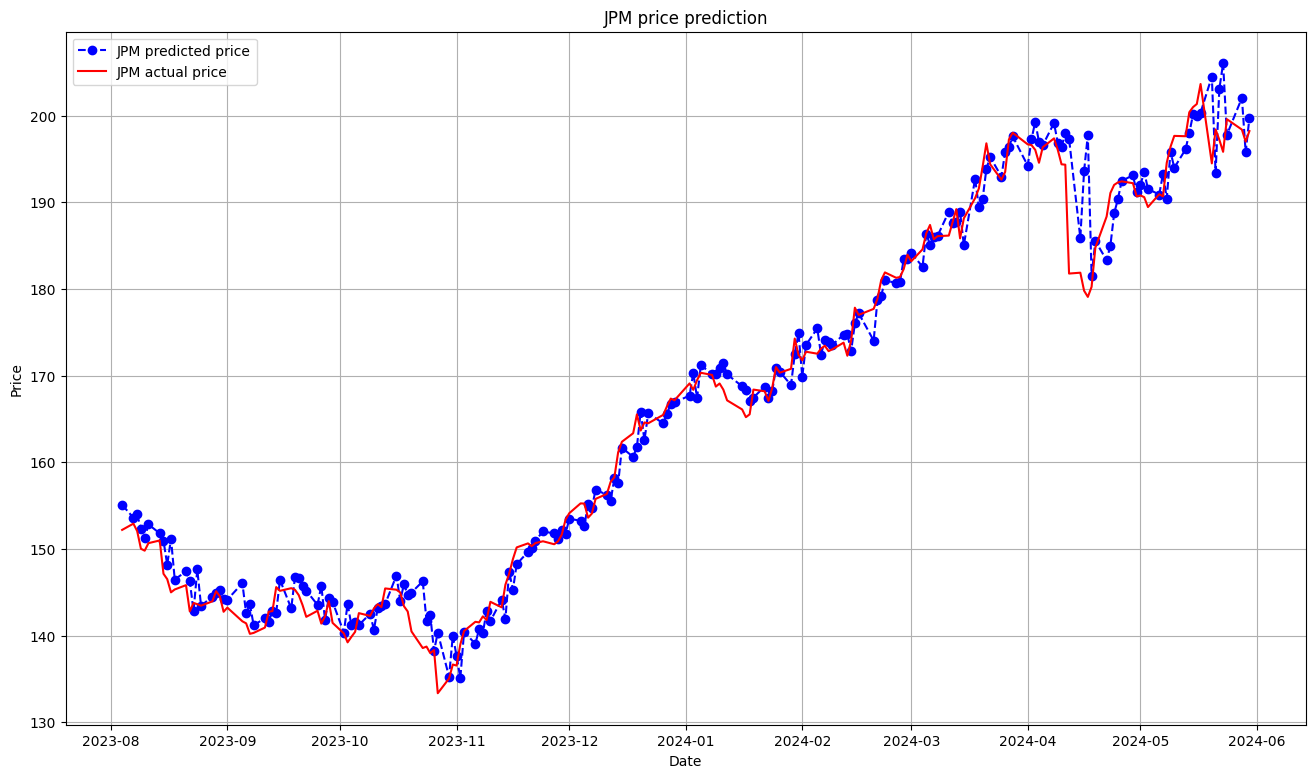

In [64]:
plt.figure(figsize=(16,9))
plt.grid(True)
date_range = test_df.index
plt.plot(date_range, models_predictions['JPM'], color = 'blue', marker = 'o', linestyle = 'dashed', label = 'JPM predicted price' )
plt.plot(date_range, list(test_df['JPM']), color = 'red', label = 'JPM actual price' )
plt.title('JPM price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### BAC

In [65]:
mse = mean_squared_error(test_df['BAC'], models_predictions['BAC'])
print(f"BAC MSE: {mse}")
print(f"BAC RMSE: {np.sqrt(mse)}")

BAC MSE: 1.0922543744545194
BAC RMSE: 1.0451097427804026


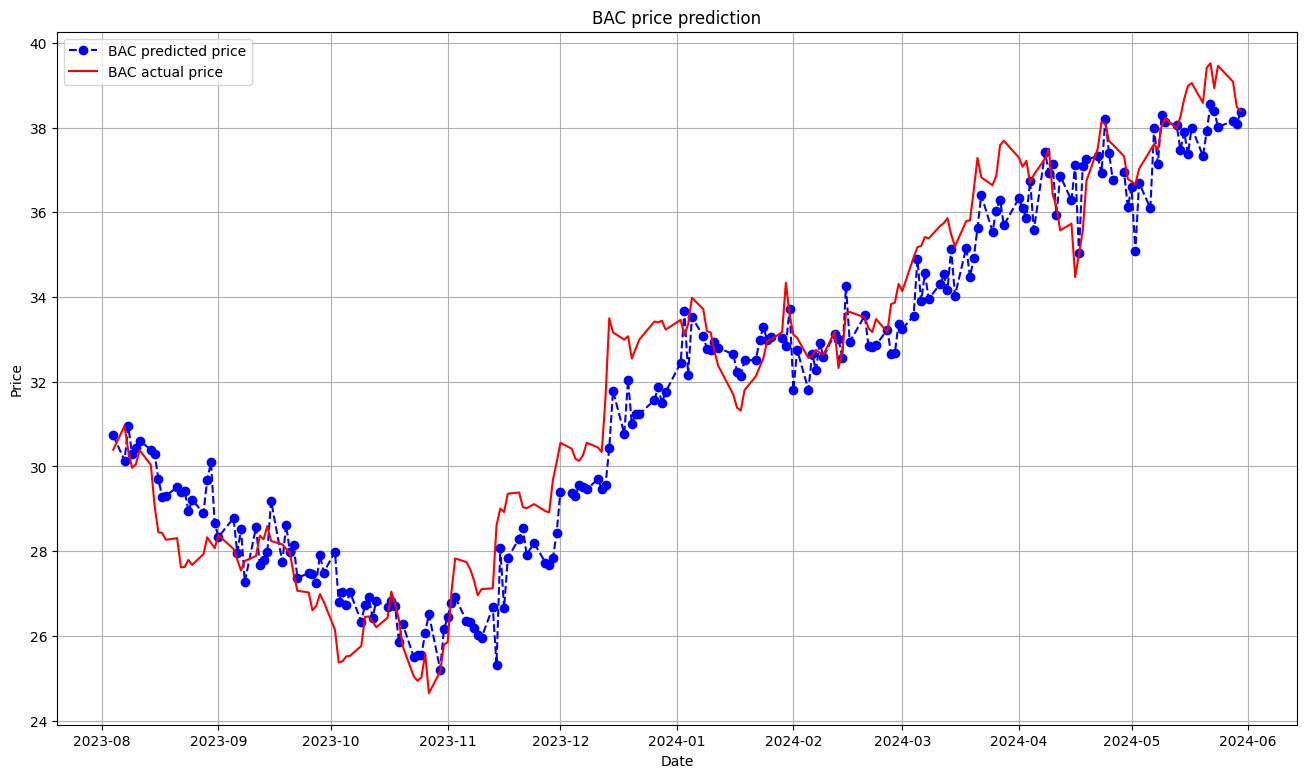

In [66]:
plt.figure(figsize=(16,9))
plt.grid(True)
date_range = test_df.index
plt.plot(date_range, models_predictions['BAC'], color = 'blue', marker = 'o', linestyle = 'dashed', label = 'BAC predicted price' )
plt.plot(date_range, list(test_df['BAC']), color = 'red', label = 'BAC actual price' )
plt.title('BAC price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### JNJ

In [67]:
mse = mean_squared_error(test_df['JNJ'], models_predictions['JNJ'])
print(f"JNJ MSE: {mse}")
print(f"JNJ RMSE: {np.sqrt(mse)}")

JNJ MSE: 2.159764095544916
JNJ RMSE: 1.4696135871530707


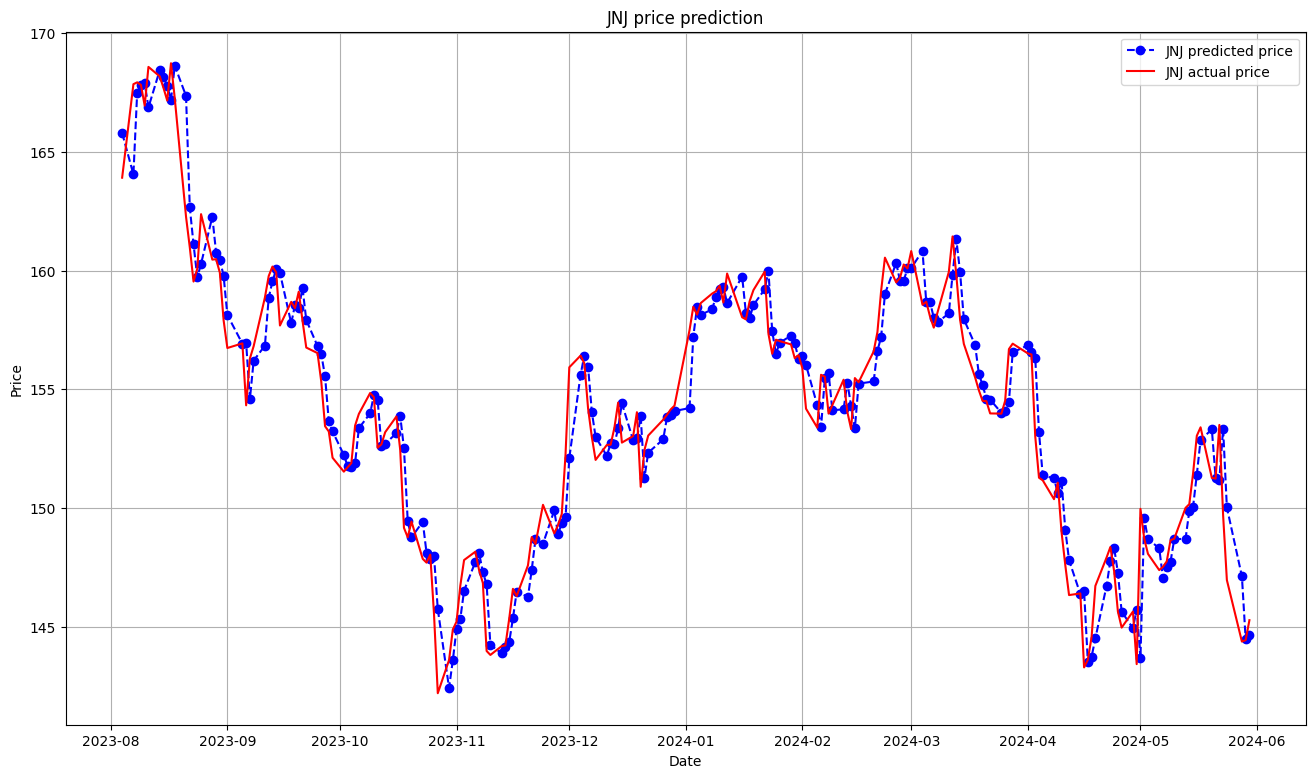

In [68]:
plt.figure(figsize=(16,9))
plt.grid(True)
date_range = test_df.index
plt.plot(date_range, models_predictions['JNJ'], color = 'blue', marker = 'o', linestyle = 'dashed', label = 'JNJ predicted price' )
plt.plot(date_range, list(test_df['JNJ']), color = 'red', label = 'JNJ actual price' )
plt.title('JNJ price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### PFE

In [69]:
mse = mean_squared_error(test_df['PFE'], models_predictions['PFE'])
print(f"PFE MSE: {mse}")
print(f"PFE RMSE: {np.sqrt(mse)}")

PFE MSE: 0.6927331945997535
PFE RMSE: 0.8323059501167546


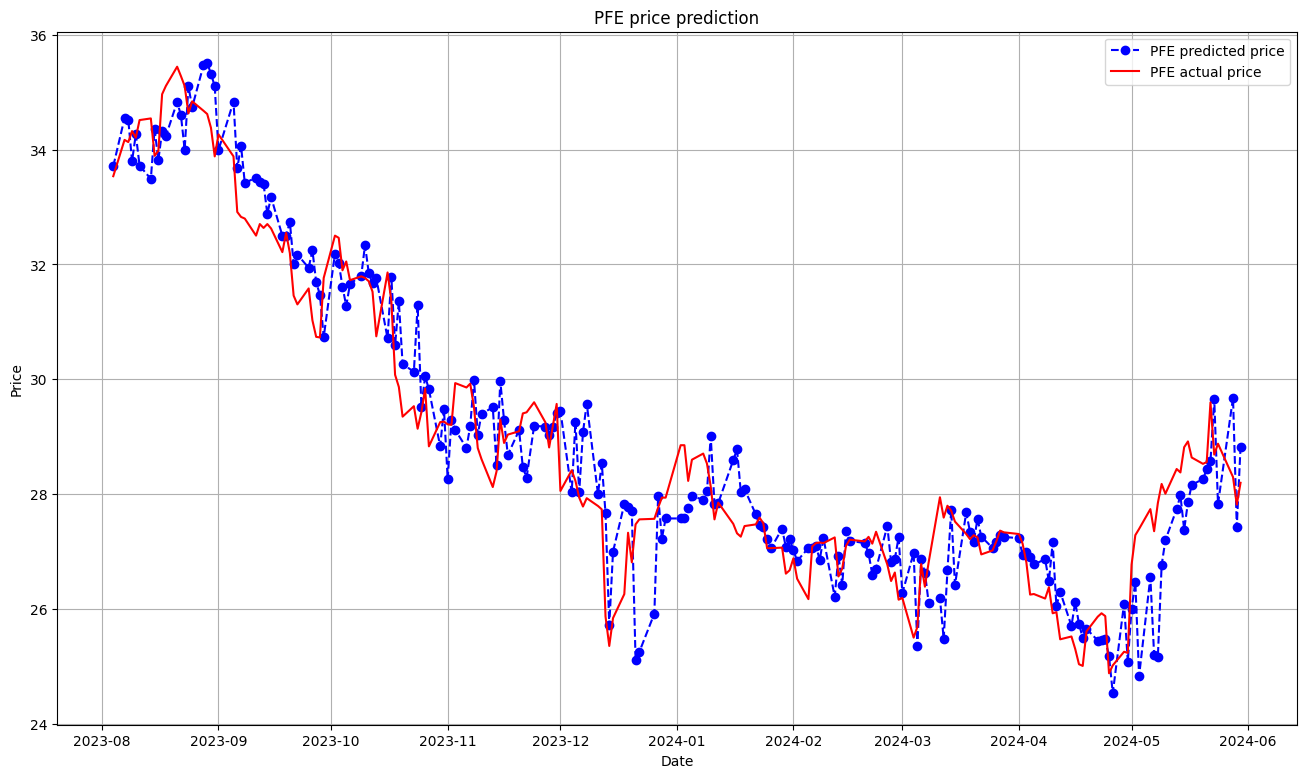

In [70]:
plt.figure(figsize=(16,9))
plt.grid(True)
date_range = test_df.index
plt.plot(date_range, models_predictions['PFE'], color = 'blue', marker = 'o', linestyle = 'dashed', label = 'PFE predicted price' )
plt.plot(date_range, list(test_df['PFE']), color = 'red', label = 'PFE actual price' )
plt.title('PFE price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Strategie di trading e backtesting

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from tqdm import tqdm

In [92]:
# Caricamento dei dati
symbol = 'NVDA'
data = pd.DataFrame()
data[symbol] = daily_close_px[symbol]

In [93]:
# Suddivisione dei dati in training (80%) e test (20%)
split_ratio = 0.8
split_index = int(len(data) * split_ratio)
train_data = data[:split_index].copy()
test_data = data[split_index:].copy()

In [94]:
# Funzione di backtesting con parametri SMA
def backtest_strategy(data, SMA1, SMA2):
    data['SMA1'] = data[symbol].rolling(window=SMA1).mean()
    data['SMA2'] = data[symbol].rolling(window=SMA2).mean()
    data.dropna(inplace=True)
    data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
    data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    data.loc[data['Position'].shift(1) == -1, 'Strategy'] = 0  # Zero returns when position is -1
    data.dropna(inplace=True)
    return np.exp(data['Strategy'].sum())

In [95]:
# Definire il range dei parametri per il tuning
SMA1 = range(20, 61, 2)
SMA2 = range(180, 281, 2)

In [96]:
best_performance = -np.inf
best_params = None

total_iterations = len(SMA1) * len(SMA2)

# Effettuare la grid search sui dati di training
with tqdm(total=total_iterations, desc="Grid Search Progress", ncols=100) as pbar:
    for SMA1, SMA2 in product(SMA1, SMA2):
        performance = backtest_strategy(train_data.copy(), SMA1, SMA2)
        if performance > best_performance:
            best_performance = performance
            best_params = {'SMA1': SMA1, 'SMA2': SMA2}
        pbar.update(1)

print("Best Performance on Training Data:", best_performance)
print("Best Parameters:", best_params)

Grid Search Progress: 100%|████████████████████████████████████| 1071/1071 [00:03<00:00, 296.84it/s]

Best Performance on Training Data: 54.55990573292189
Best Parameters: {'SMA1': 52, 'SMA2': 182}


In [97]:
# Valutare la strategia sui dati di test con i migliori parametri trovati
test_performance = backtest_strategy(test_data.copy(), best_params['SMA1'], best_params['SMA2'])
print("Performance on Test Data:", test_performance)

Performance on Test Data: 5.024734531777469


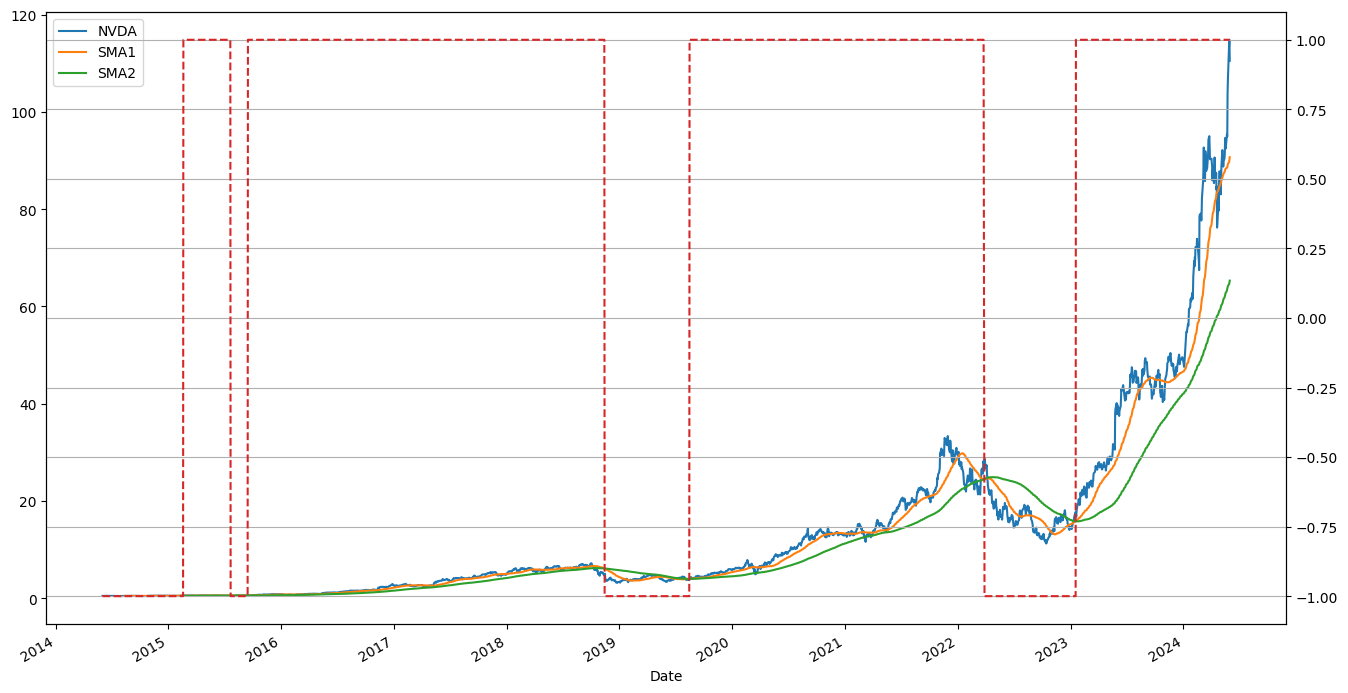

In [98]:
# Visualizzazione dei risultati sul'intero dataset
data['SMA1'] = data[symbol].rolling(window=best_params['SMA1']).mean()
data['SMA2'] = data[symbol].rolling(window=best_params['SMA2']).mean()
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

data[[symbol, 'SMA1', 'SMA2']].plot(figsize=(16,9))
data['Position'].plot(secondary_y='Position', style='--')
plt.grid()

In [99]:
# Calcolo la strategia su tutto il dataset
data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))
data['Strategy'] = data['Position'].shift(1) * data['Returns']
data.loc[data['Position'].shift(1) == -1, 'Strategy'] = 0  # Zero returns when position is -1
data.dropna(inplace=True)

In [100]:
# Calcolo delle metriche di performance
performance_metrics = {
    'Cumulative_Returns_Buy_and_Hold': np.exp(data['Returns'].sum()),
    'Cumulative_Returns_Strategy': np.exp(data['Strategy'].sum()),
    'Annualized_Returns_Buy_and_Hold': np.exp(data['Returns'].mean() * 252),
    'Annualized_Returns_Strategy': np.exp(data['Strategy'].mean() * 252),
    'Volatility_Buy_and_Hold': data['Returns'].std() * np.sqrt(252),
    'Volatility_Strategy': data['Strategy'].std() * np.sqrt(252)
}

for key, value in performance_metrics.items():
    print(f"{key}: {value}")

Cumulative_Returns_Buy_and_Hold: 208.0856351060829
Cumulative_Returns_Strategy: 347.11553497919573
Annualized_Returns_Buy_and_Hold: 1.778624769788031
Annualized_Returns_Strategy: 1.8795677657825032
Volatility_Buy_and_Hold: 0.4812940862437669
Volatility_Strategy: 0.41383311454035515


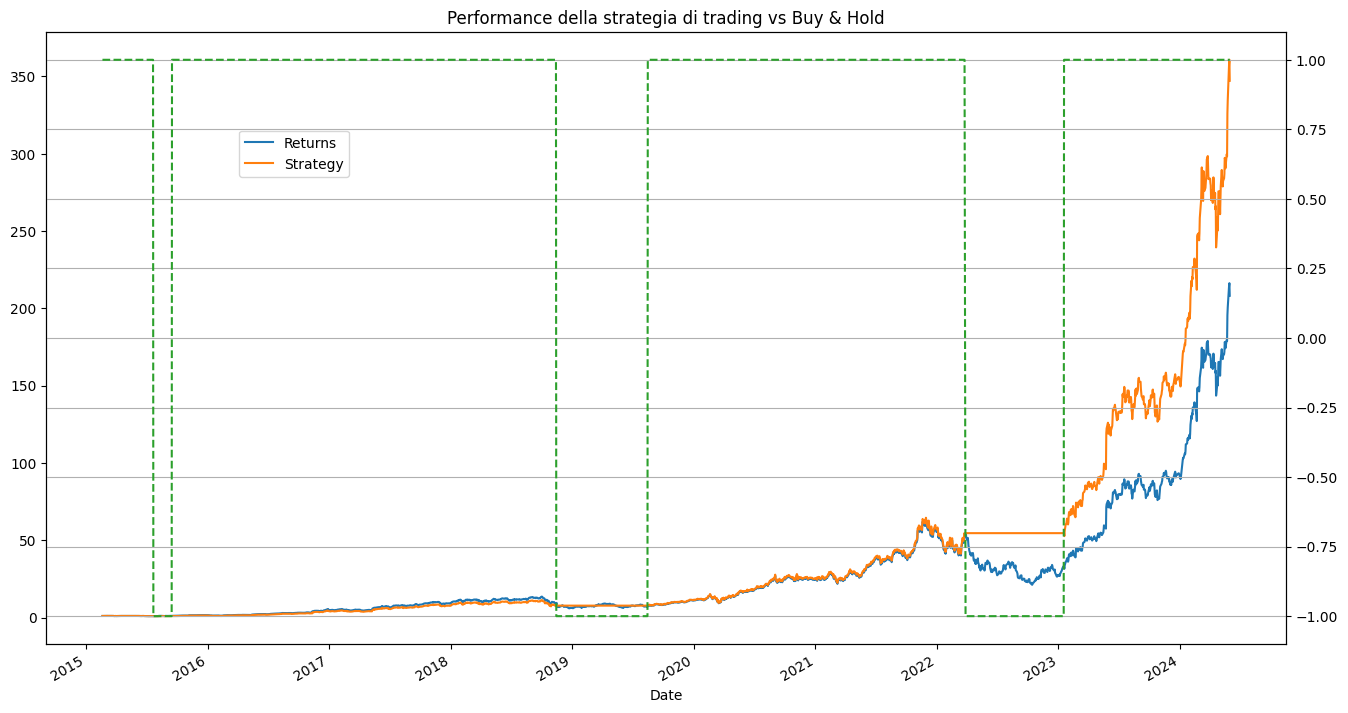

In [101]:
# Visualizzazione dei risultati
ax = data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(16,9))
data['Position'].plot(ax=ax, secondary_y='Position', style = '--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))
plt.grid()
plt.title('Performance della strategia di trading vs Buy & Hold')
plt.show()

## CAPM